### **Algoritmo del MDS clasico** 

**Input:** Matrix de distancias al cuadrado $D_2 \in \mathbf{R}^{n\times m}$ y $k\geq 1$, enter.   
**Output:** Vector de $K$-dimensiones que representa $Y\in\mathbf{R}^{n\times k}$.

**Steps**   
**1.** Caclular la matriz de Gramm $G = \frac{-1}{2}CD_2C$.   
**2.** Encontrar los top-$k$ vectores propios de $G$. ($G \approx U_k\Lambda _kU_k^t$)   
**3.** Construir la matriz $Y = U_k \Lambda ^{1/2}_k$.

In [1]:
# importamos Librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances


np.set_printoptions(suppress=True, precision=3)


Versión no matricial de la matriz de Gramm
$$
g_{ij}= -\frac{1}{2}(D^2_{ij}-\frac{1}{n}\sum^n_{k=1} D_{ik}^{2}-\frac{1}{n}\sum^n_{k=1} D_{kj}^{2} + \frac{1}{n^2}\sum^n_{k=1}\sum^n_{l=1} D_{kl}^{2})
$$

In [2]:
from sklearn.manifold import MDS

# Definir la matriz D con tipo float64 (precisión estándar)
D = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, np.sqrt(2), 2, np.sqrt(2)],
    [1, np.sqrt(2), 0, np.sqrt(2), 2],
    [1, 2, np.sqrt(2), 0, np.sqrt(2)],
    [1, np.sqrt(2), 2, np.sqrt(2), 0]
], dtype=np.float64) 


In [3]:
def classic_MDS(D, k=2):   
    D_2 = np.square(D)  # Matriz de distancias al cuadrado

    # 1. Hallamos la matriz de Gramm (Sin la representación matricial)
    G = np.zeros(0) # Matriz de Gramm

    d_i_squared = np.mean(D_2, axis=1, keepdims=True)  # Tamaño (n, 1)
    d_j_squared = np.mean(D_2, axis=0, keepdims=True)  # Tamaño (1, n)
    d_total_squared = np.mean(D_2)
    G = -0.5 * (D_2 - d_i_squared - d_j_squared + d_total_squared)

    # 2. Hallamos los autovalores y autovectores de la matriz de Gramm
    eigenvalues, eigenvectors = np.linalg.eigh(G)

    # 3. Ordenamos los autovalores y autovectores
    idx = np.argsort(eigenvalues)[::-1]  # Ordenamos de mayor a menor
    eigenvalues = eigenvalues[idx]

    eigenvectors = eigenvectors[:, idx]

    # 4. Seleccionamos los dos primeros autovalores y autovectores
    if k > np.linalg.matrix_rank(G):
        raise ValueError("k no puede ser mayor que el rango de la matriz G.")

    L = np.diag(np.sqrt(eigenvalues[:k]))  # Matriz diagonal de autovalores
    V = eigenvectors[:, :k]  # Matriz de autovectores
    Y = V @ L  # Proyección en el espacio de menor dimensión
    
    return Y # Retornamos la proyección, autovalores y autovectores

In [4]:
classic_MDS(D)

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0., -1.],
       [-1.,  0.],
       [ 0.,  1.]])

Cargamos el conjunto de datos con información de las ciudades de Colombia, los manipulamos para trabajar con información relevante y calculamos la distancia entre distancias mediante la fórmula de Haversine (convirtiendo las coordenadas a radianes y luego aplicando la fórmula).   
*https://simplemaps.com/data/co-cities*

1. Generamos un marco de datos.
2. Manipulamos el marco de datos (eliminamos columnas innecesarias y convertimos las coordenadas a radianes).
4. Calculamos distancias con la fórmula de Haversine.

In [5]:
colombia_map = pd.read_csv('co.csv', sep=',', header=0, index_col=0)
colombia_map = pd.DataFrame(colombia_map)
colombia_map

lat      lng   country iso2       admin_name  capital  \
city                                                                        
Bogotá           4.7111 -74.0722  Colombia   CO           Bogotá  primary   
Medellín         6.2308 -75.5906  Colombia   CO        Antioquia    admin   
Cali             3.4206 -76.5222  Colombia   CO  Valle del Cauca    admin   
Barranquilla    10.9833 -74.8019  Colombia   CO        Atlántico    admin   
Cartagena       10.4000 -75.5000  Colombia   CO          Bolívar    admin   
...                 ...      ...       ...  ...              ...      ...   
Leticia         -4.2167 -69.9333  Colombia   CO         Amazonas    admin   
La Virginia      4.9167 -75.8333  Colombia   CO        Risaralda    minor   
Mitú             1.1983 -70.1733  Colombia   CO           Vaupés    admin   
Inírida          3.8653 -67.9239  Colombia   CO          Guainía    admin   
Puerto Carreño   6.1903 -67.4836  Colombia   CO          Vichada    admin   

                population  population_proper  
city                                           
Bogotá             7968095            7743955  
Medellín           2529403            2529403  
Cali               2471474            2471474  
Barranquilla       1326588            1274250  
Cartagena           914552             914552  
...                    ...                ...  
Leticia              33503              32450  
La Virginia          32330              32330  
Mitú                 28382              28382  
Inírida              20279              19816  
Puerto Carreño       16763              16763  

[84 rows x 8 columns]

In [6]:
colombia_map.drop(columns=['country','iso2','admin_name','capital','population','population_proper'], axis=1, inplace=True)

In [7]:
colombia_map

lat      lng
city                            
Bogotá           4.7111 -74.0722
Medellín         6.2308 -75.5906
Cali             3.4206 -76.5222
Barranquilla    10.9833 -74.8019
Cartagena       10.4000 -75.5000
...                 ...      ...
Leticia         -4.2167 -69.9333
La Virginia      4.9167 -75.8333
Mitú             1.1983 -70.1733
Inírida          3.8653 -67.9239
Puerto Carreño   6.1903 -67.4836

[84 rows x 2 columns]

In [8]:
lat_rad = [grad * np.pi / 180 for grad in colombia_map['lat']]
lng_rad = [grad * np.pi / 180 for grad in colombia_map['lng']]

colombia_map['lat'] = lat_rad
colombia_map['lng'] = lng_rad
colombia_map = colombia_map.reset_index()  # Moves 'city' back to a column

In [9]:
colombia_map

city       lat       lng
0           Bogotá  0.082224 -1.292804
1         Medellín  0.108748 -1.319305
2             Cali  0.059701 -1.335564
3     Barranquilla  0.191695 -1.305539
4        Cartagena  0.181514 -1.317724
..             ...       ...       ...
79         Leticia -0.073595 -1.220566
80     La Virginia  0.085813 -1.323541
81            Mitú  0.020914 -1.224755
82         Inírida  0.067462 -1.185496
83  Puerto Carreño  0.108041 -1.177811

[84 rows x 3 columns]

In [10]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Creamos una matriz de distancias vacía
n = len(colombia_map.iloc[:len(colombia_map)])
col_haversine = np.zeros((n,n))

# Calculamos las distancias entre cada par de puntos
for i in range(n):
    for j in range(n):
        col_haversine[i, j] = haversine(colombia_map['lat'][i], colombia_map['lng'][i],colombia_map['lat'][j], colombia_map['lng'][j])
    

De este modo obtenemos la matriz de distancias la cual elevaremos al cuadrado para aplicar el modelo clasico de MDS.

In [11]:
col_haversine


array([[   0.   ,  238.329,  307.298, ...,  583.069,  688.194,  747.6  ],
       [ 238.329,    0.   ,  329.084, ...,  821.119,  888.931,  896.169],
       [ 307.298,  329.084,    0.   , ...,  747.38 ,  955.43 , 1047.695],
       ...,
       [ 583.069,  821.119,  747.38 , ...,    0.   ,  387.78 ,  630.191],
       [ 688.194,  888.931,  955.43 , ...,  387.78 ,    0.   ,  263.088],
       [ 747.6  ,  896.169, 1047.695, ...,  630.191,  263.088,    0.   ]])

El siguiente mapa de calor nos muestra la correlación y similitudes -en este caso la cercania- entre las ciudades colombianas y como se encuentran ubicadas en el mapa.

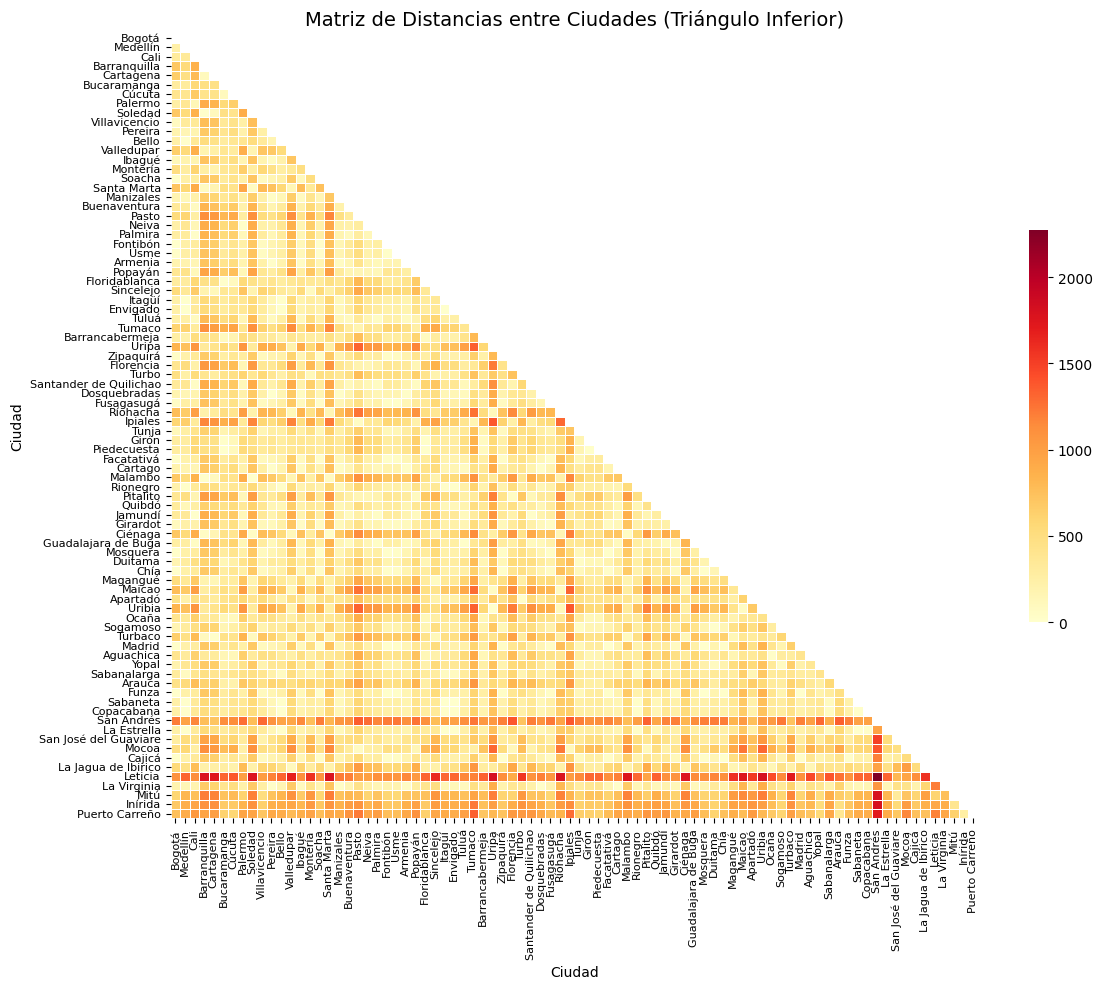

In [12]:
city_labels = colombia_map['city'].head(n).values

# Crear máscara para el triángulo superior (True oculta)
mask = np.triu(np.ones_like(col_haversine, dtype=bool))

plt.figure(figsize=(12, 10))
sb.heatmap(
    col_haversine,
    mask=mask,
    cmap="YlOrRd",
    linewidths=0.5,
    xticklabels=city_labels,
    yticklabels=city_labels,
    cbar_kws={"shrink": 0.5},   # barra de color más pequeña
    annot=False,                # quitar anotaciones para no saturar
)

plt.title("Matriz de Distancias entre Ciudades (Triángulo Inferior)", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Ciudad")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


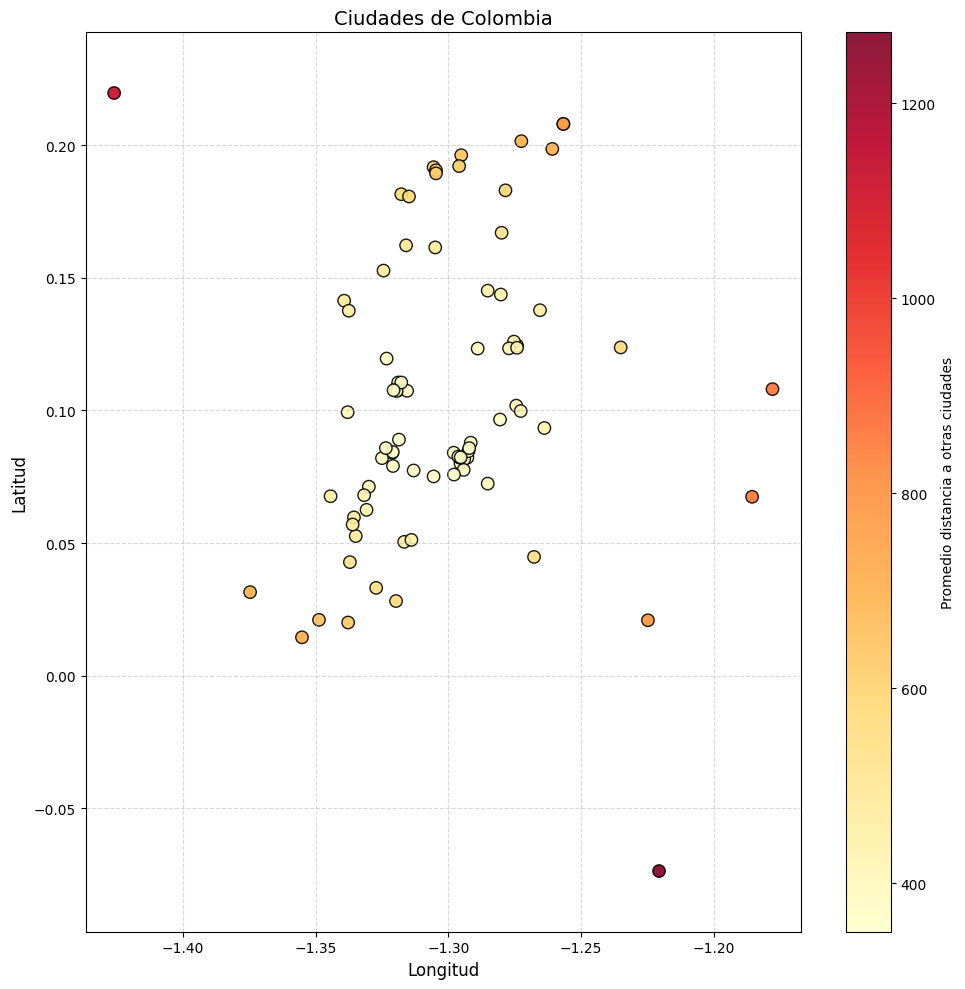

In [13]:
mean_distances = np.mean(col_haversine, axis=1)  # promedio por fila

plt.figure(figsize=(10, 10))
plt
scatter = plt.scatter(
    colombia_map['lng'],
    colombia_map['lat'],
    c=mean_distances,
    cmap='YlOrRd',      
    edgecolors='black',
    s=80,
    alpha=0.9
)

plt.colorbar(scatter, label='Promedio distancia a otras ciudades')

plt.title('Ciudades de Colombia', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')  # Mantener proporción para no distorsionar el mapa
plt.tight_layout()
plt.show()


In [14]:
import plotly.express as px

# Promedio de distancia o cualquier métrica que tengas para colorear
mean_distances = np.mean(col_haversine, axis=1)

fig = px.scatter(
    colombia_map,
    x='lng',
    y='lat',
    color=mean_distances,
    color_continuous_scale='YlOrRd',  
    hover_name='city',              
    size_max=15,
    title='Ciudades de Colombia'
)

fig.update_traces(marker=dict(
    size=8,
    line=dict(width=1, color='black')
))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Longitud',
    yaxis_title='Latitud',
    yaxis_scaleanchor="x",   # Mantiene proporción en el mapa
    yaxis_scaleratio=1,
    xaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.5,
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=1,
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.5,
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=1,
    ),
    height=700,
    width=700,
)

fig.show()


In [15]:
fig.write_html("ciudades_col_interactivo.html")

Now we apply MDS on the distance matrix found before $col\_haversine$

In [16]:
Y = classic_MDS(col_haversine)
Y

array([[ -133.63 ,    68.919],
       [   22.104,  -111.501],
       [ -297.201,  -191.187],
       [  555.581,   -64.523],
       [  485.179,  -135.864],
       [  144.179,   166.048],
       [  232.899,   213.805],
       [ -346.906,   -66.655],
       [  548.627,   -58.308],
       [ -192.056,   122.278],
       [ -135.838,  -111.211],
       [   33.668,  -109.717],
       [  513.322,   109.045],
       [ -174.255,   -57.041],
       [  299.09 ,  -164.369],
       [ -148.642,    53.496],
       [  589.233,    -1.703],
       [ -102.959,   -97.618],
       [ -250.636,  -250.773],
       [ -548.813,  -256.53 ],
       [ -340.849,   -49.671],
       [ -276.93 ,  -162.404],
       [ -137.823,    61.585],
       [ -163.661,    62.353],
       [ -167.245,  -107.228],
       [ -405.107,  -192.815],
       [  152.84 ,   157.974],
       [  363.494,  -115.441],
       [   14.781,  -113.847],
       [   15.193,  -108.335],
       [ -221.064,  -161.014],
       [ -494.226,  -426.471],
       [

Aplicamos sobre los 84 datos solo para ver graficamente.

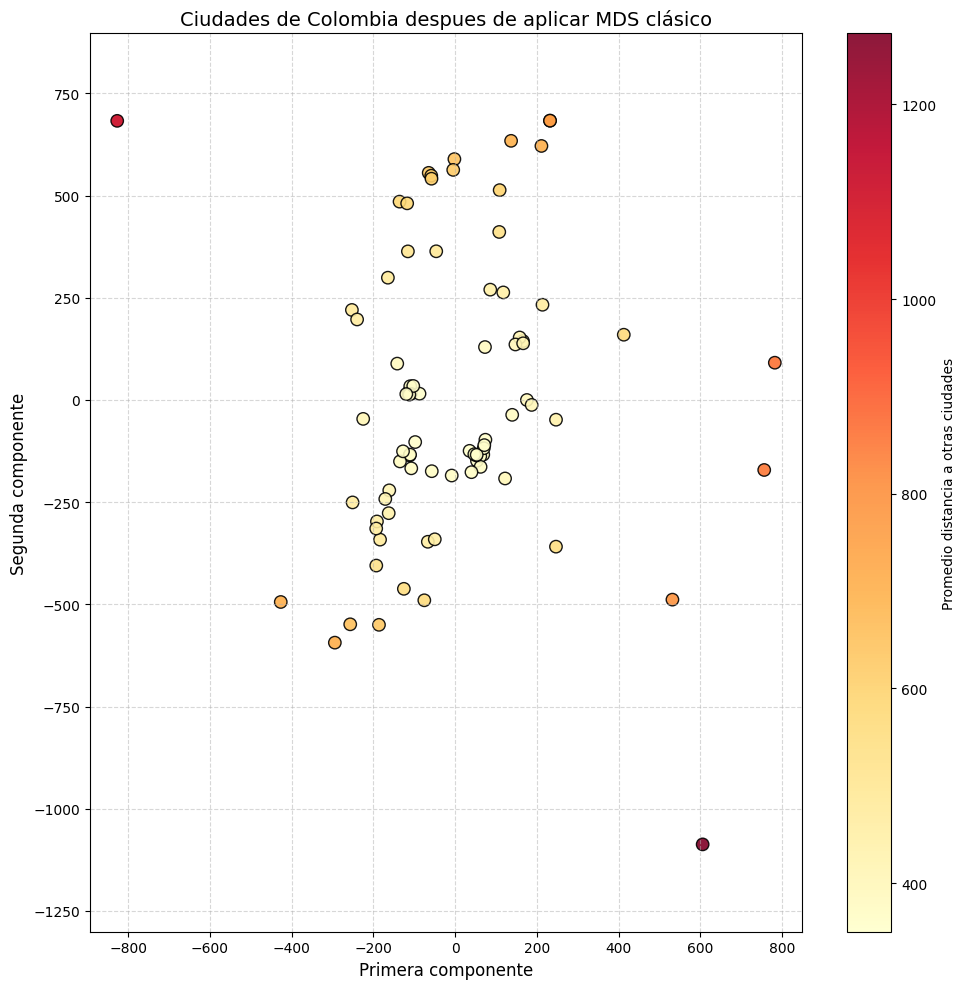

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(Y[:, 1], Y[:, 0], c=mean_distances, cmap='YlOrRd', edgecolors='black', s=80, alpha=0.9)
plt.colorbar(label='Promedio distancia a otras ciudades')
plt.title('Ciudades de Colombia despues de aplicar MDS clásico', fontsize=14)
plt.xlabel('Primera componente', fontsize=12)
plt.ylabel('Segunda componente', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')  # Mantener proporción para no distorsionar el mapa
plt.tight_layout()
plt.show()

In [18]:
import plotly.express as px

# Promedio de distancia o cualquier métrica que tengas para colorear
mean_distances = np.mean(col_haversine, axis=1)

fig = px.scatter(
    colombia_map,
    x=Y[:, 1],
    y=Y[:, 0],
    color=mean_distances,
    color_continuous_scale='YlOrRd',  
    hover_name='city',              
    size_max=15,
    title='Ciudades de Colombia después de aplicar MDS clásico'
)

fig.update_traces(marker=dict(
    size=8,
    line=dict(width=1, color='black')
))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Primera Componente',
    yaxis_title='Segunda Componente',
    yaxis_scaleanchor="x",   # Mantiene proporción en el mapa
    yaxis_scaleratio=1,
    xaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.5,
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=1,
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.5,
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=1,
    ),
    height=700,
    width=700,
)

fig.show()


In [19]:
fig.write_html("ciudades_col_reducido_interactivo.html")

In [20]:
Y_3 = classic_MDS(col_haversine, k=3)  # Aplicamos MDS clásico con 3 dimensiones
Y_3

array([[ -133.63 ,    68.919,     7.638],
       [   22.104,  -111.501,     6.051],
       [ -297.201,  -191.187,    -1.476],
       [  555.581,   -64.523,    -3.624],
       [  485.179,  -135.864,    -1.444],
       [  144.179,   166.048,     6.262],
       [  232.899,   213.805,     3.626],
       [ -346.906,   -66.655,     1.328],
       [  548.627,   -58.308,    -3.343],
       [ -192.056,   122.278,     7.196],
       [ -135.838,  -111.211,     4.745],
       [   33.668,  -109.717,     6.11 ],
       [  513.322,   109.045,    -3.477],
       [ -174.255,   -57.041,     5.463],
       [  299.09 ,  -164.369,     2.816],
       [ -148.642,    53.496,     7.394],
       [  589.233,    -1.703,    -5.303],
       [ -102.959,   -97.618,     5.514],
       [ -250.636,  -250.773,    -2.755],
       [ -548.813,  -256.53 ,   -14.714],
       [ -340.849,   -49.671,     1.954],
       [ -276.93 ,  -162.404,     0.211],
       [ -137.823,    61.585,     7.558],
       [ -163.661,    62.353,     

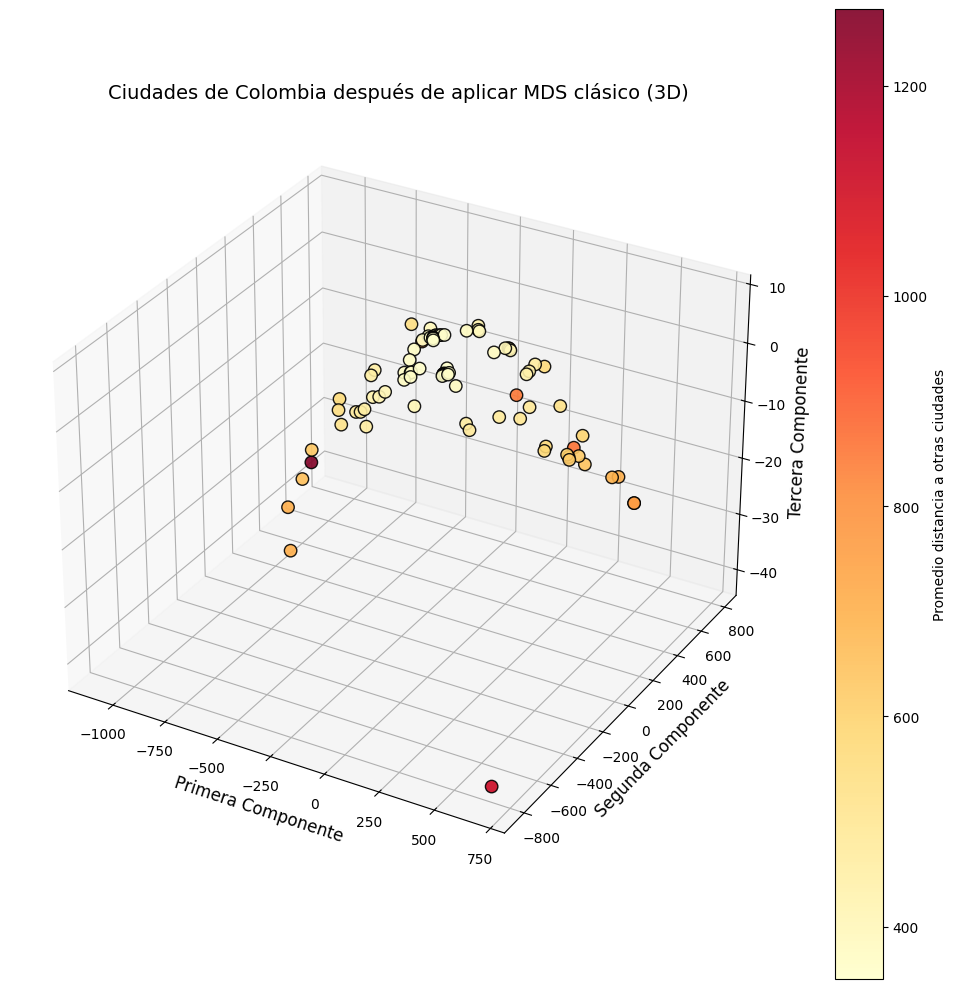

In [21]:
# Graficamos las tres dimensiones
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(Y_3[:, 0], Y_3[:, 1], Y_3[:, 2], c=mean_distances, cmap='YlOrRd', edgecolors='black', s=80, alpha=0.9)
ax.set_title('Ciudades de Colombia después de aplicar MDS clásico (3D)', fontsize=14)
ax.set_xlabel('Primera Componente', fontsize=12)
ax.set_ylabel('Segunda Componente', fontsize=12)
ax.set_zlabel('Tercera Componente', fontsize=12)
plt.colorbar(ax.collections[0], label='Promedio distancia a otras ciudades')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=Y_3[:, 0],
    y=Y_3[:, 1],
    z=Y_3[:, 2],
    mode='markers',
    marker=dict(
        size=7,
        color=mean_distances,
        colorscale='YlOrRd',
        colorbar=dict(title='Promedio distancia'),
        opacity=0.9,
        line=dict(width=1, color='black')  # Borde negro
    ),
    text=colombia_map['city'],  # Etiquetas hover
    hoverinfo='text'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Primera Componente',
        yaxis_title='Segunda Componente',
        zaxis_title='Tercera Componente',
        xaxis=dict(showgrid=True, gridcolor='lightgrey'),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        zaxis=dict(showgrid=True, gridcolor='lightgrey'),
    ),
    title='Ciudades de Colombia después de aplicar MDS clásico (3D)',
    width=900,
    height=750
)

fig.show()


In [23]:
fig.write_html("ciudades_col_reducido_3d_interactivo.html")

**Validación y evaluacion**   
Verificamos la exactitud del método implementado con el metodo incluido en la sklearn (libreria de Python) al comparar la matriz distancia y verificar su nivel de Stress o perdida.

In [24]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances


# Configurar MDS con los mismos parámetros
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordenadas_sklearn = mds.fit_transform(col_haversine)


# Comparar coordenadas (pueden diferir en rotación/reflexión)
distancias_sklearn = np.round(pairwise_distances(coordenadas_sklearn), 6)
distancias_manual = np.round(pairwise_distances(Y), 6)

Stress: 0.0003


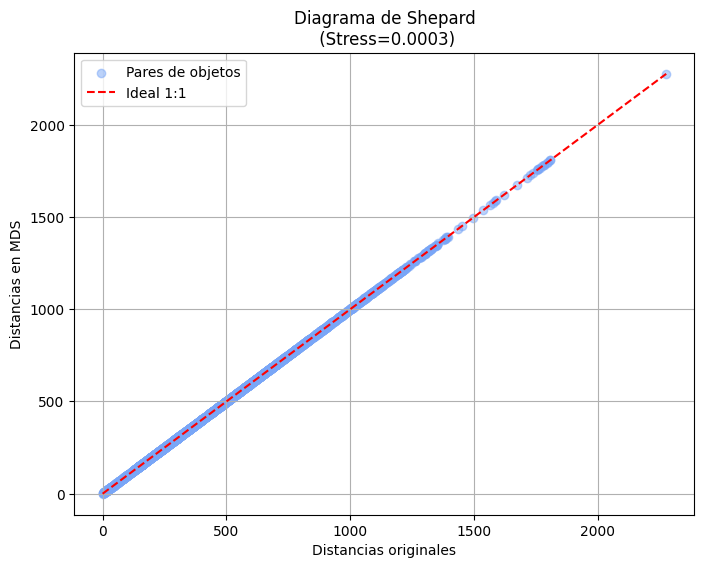

In [25]:
distancias_originales = col_haversine   
distancias_reducidas = pairwise_distances(Y)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

### **Casos de uso - Aplicación MDS clasico con datos no metricos**

#### **Primer caso de uso: representación de palabras en el plano**   
 La idea es representar y visualizar palabras en un plano, usaremos matriz de concurrencia y Word vectors/embeddings (Word2Vectors y GloVe pre-entrenada)

In [26]:
# Descargar el modelo pre entrenado de Word2Vec
import gensim
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Descargar el corpus Reuters
import nltk
nltk.download('brown')
from nltk.corpus import brown


import numpy as np
import random
import scipy as sp


# La idea es usar MDS para reducir la dimensionalidad de los datos
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\laura\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [27]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


Este primer intento usamos la matriz de concurrencia de las palabras en un texto dado (En este caso el Brown corpus)

In [28]:
START_TOKEN = '<START>'
END_TOKEN = '<END>'

def read_corpus(category="government"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = brown.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(brown.words(f))] + [END_TOKEN] for f in files]




In [29]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, num_words = sorted(list(set([i for x in corpus for i in x]))),len(sorted(list(set([i for x in corpus for i in x]))))
    M = None
    word2ind = {}
    
    # ------------------
    # Write your implementation here.
    
    M = np.zeros((num_words, num_words))
    for index, word in enumerate(words):
        word2ind[word] = index

    for sentence in corpus:
        for j in range(len(sentence)):  
            central_word = sentence[j]
            central_index = word2ind[central_word] 

            start = max(0, j - window_size)
            end = min(len(sentence), j + window_size + 1)

            for i in range(start, end):
                if i != j: 
                    context_word = sentence[i]
                    context_index = word2ind[context_word]
                    M[context_index, central_index] += 1 

    # ------------------

    return M, word2ind

In [30]:
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
print("M_test:\n", M_test)
print("word2ind_test:\n", word2ind_test)

M_test:
 [[0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 1. 0.]]
word2ind_test:
 {'<END>': 0, '<START>': 1, 'All': 2, 'ends': 3, 'glitters': 4, 'gold': 5, "isn't": 6, 'that': 7, 'well': 8}


In [31]:
brown_corpus_token = read_corpus()

In [32]:
M, word2ind_occ = compute_co_occurrence_matrix(brown_corpus_token, window_size=10)
print(M)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


In [33]:
M_reduced_occ = classic_MDS(M)

In [34]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_embeddings(M_reduced, word2ind, words, title, figsize=(10, 8)):
    # Configuración minimalista
    plt.style.use('default')  # Reset a estilo clásico
    fig, ax = plt.subplots(figsize=figsize)
    
    # Colores y parámetros
    point_color = "#b4471f"  # Azul estándar
    text_color = '#333333'   # Gris oscuro
    line_color = '#7f7f7f'   # Gris medio
    
    # Coordenadas
    words_index = [word2ind[word] for word in words]
    x_coords = [M_reduced[idx, 0] for idx in words_index]
    y_coords = [M_reduced[idx, 1] for idx in words_index]

    # Puntos simples pero claros
    ax.scatter(
        x_coords, y_coords,
        c=point_color,
        s=80,
        alpha=0.8,
        edgecolors='white',
        linewidths=1
    )
    
    # Texto inicial
    texts = [
        plt.text(
            x_coords[i],
            y_coords[i],
            words[i],
            fontsize=10,
            ha='center',
            va='center',
            color=text_color
        ) for i in range(len(words))
    ]
    
    # Ajuste de texto con líneas
    adjust_text(
        texts,
        x=x_coords,
        y=y_coords,
        arrowprops=dict(
            arrowstyle='-',
            color=line_color,
            lw=0.8,
            alpha=0.6
        ),
        expand_text=(1.2, 1.3),
        expand_points=(1.2, 1.3),
        force_text=0.3,
        force_points=0.2,
        ax=ax
    )
    
    # Ejes y cuadrícula minimalistas
    ax.axhline(0, color='#d3d3d3', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='#d3d3d3', linestyle='--', linewidth=0.7)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Títulos claros
    ax.set_title(title, fontsize=12, pad=15)
    ax.set_xlabel("Primera componente", fontsize=10)
    ax.set_ylabel("Segunda componente", fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [35]:
# 1. Filtrar palabras puramente alfabéticas (sin números/símbolos)
vocab_alphabetic = [word for word in word2ind_occ.keys() if word.isalpha()]

# 2. Seleccionar 5 palabras aleatorias
selected_words = random.sample(vocab_alphabetic, 10)
print("Palabras seleccionadas:", selected_words)

Palabras seleccionadas: ['agree', 'regardless', 'honorable', 'incentives', 'aggregate', 'recommendation', 'inventions', 'calendar', 'description', 'roll']


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


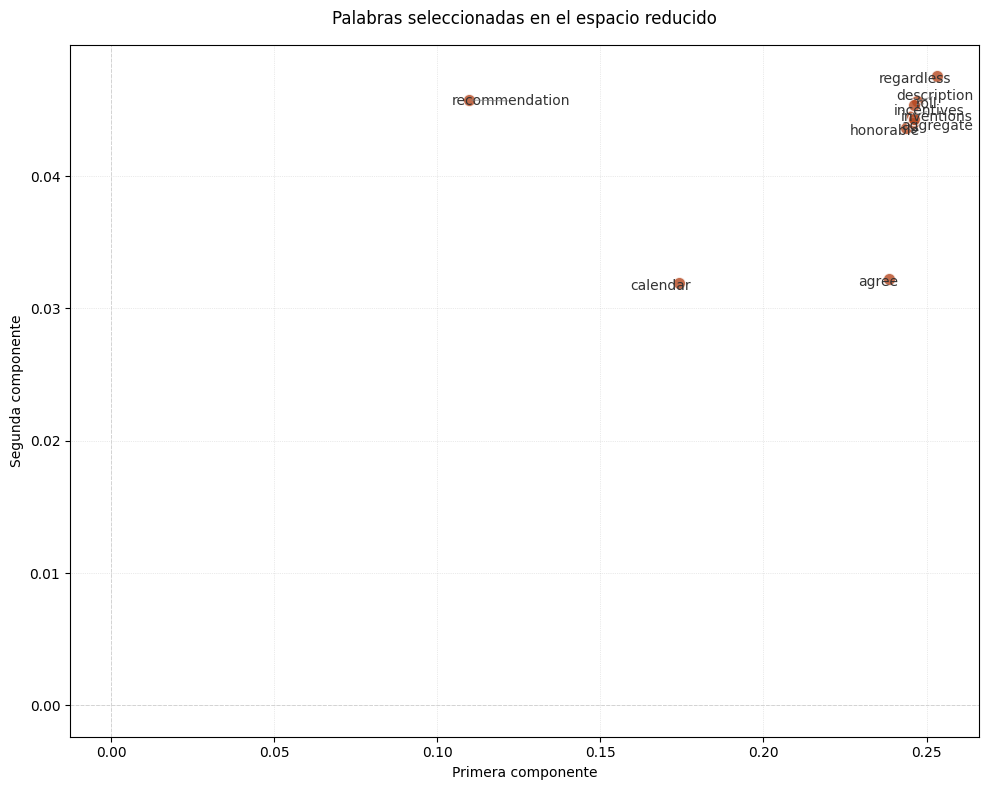

0 [-0.133 -0.563]
1 [-0.01   0.737]
2 [-0.583  0.305]
3 [ 0.537 -0.89 ]
4 [0.515 0.148]
5 [ 0.148 -0.349]
6 [-0.411  0.267]
7 [-0.614  0.908]
8 [-0.673  0.566]
9 [ 0.279 -0.327]


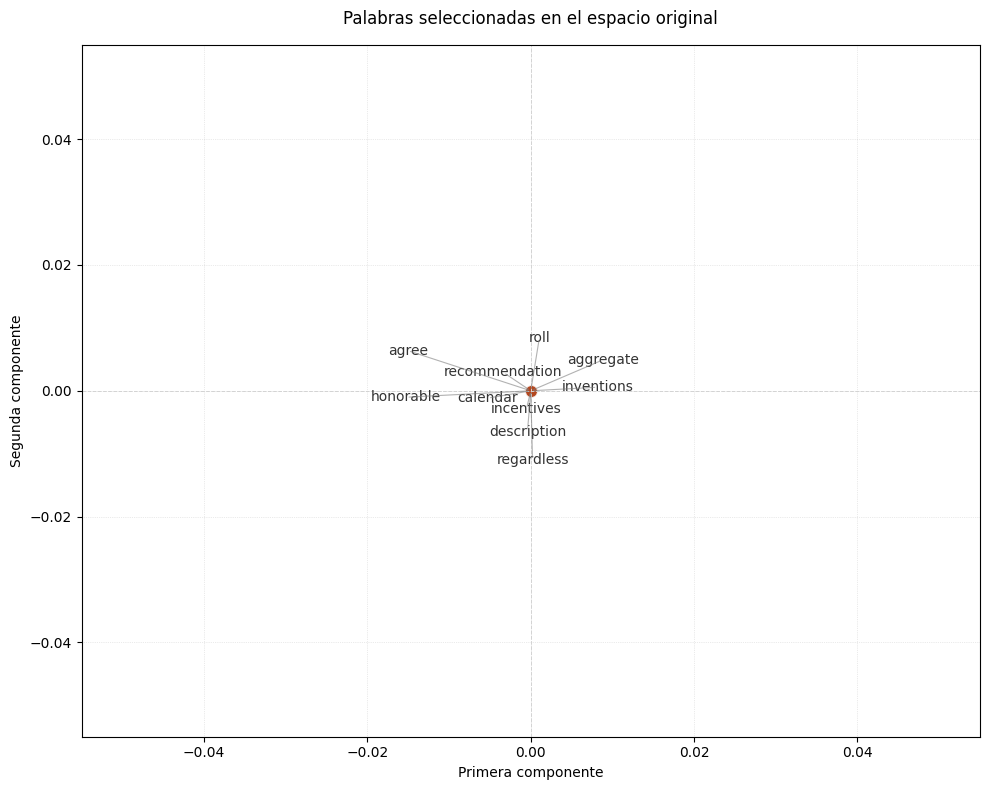

In [36]:
plot_embeddings(M_reduced_occ, word2ind_occ, selected_words,"Palabras seleccionadas en el espacio reducido")
plot_embeddings(M, word2ind_occ, selected_words,"Palabras seleccionadas en el espacio original")

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d_embeddings(M_reduced, word2ind, words, title, figsize=(10, 10)):
    # Configuración básica
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Paleta de colores simple
    point_color = '#b4471f'  # Azul
    text_color = '#333333'   # Gris oscuro
    line_color = '#7f7f7f'   # Gris medio
    
    # Obtener coordenadas
    words_index = [word2ind[word] for word in words]
    x_coords = [M_reduced[idx, 0] for idx in words_index]
    y_coords = [M_reduced[idx, 1] for idx in words_index]
    z_coords = [M_reduced[idx, 2] for idx in words_index]
    
    # Puntos 3D
    ax.scatter(
        x_coords, y_coords, z_coords,
        c=point_color,
        s=50,
        alpha=0.8,
        depthshade=True,
        edgecolors='white',
        linewidths=0.5
    )
    
    # Etiquetas de texto con líneas conectivas
    for i, word in enumerate(words):
        # Posición del texto (ligeramente desplazada en Z)
        text_z = z_coords[i] + 0.1 * (max(z_coords) - min(z_coords)) if len(z_coords) > 1 else z_coords[i] + 0.1
        
        # Línea conectiva
        ax.plot(
            [x_coords[i], x_coords[i]],
            [y_coords[i], y_coords[i]],
            [z_coords[i], text_z],
            color=line_color,
            linewidth=0.8,
            alpha=0.5
        )
        
        # Texto
        ax.text(
            x_coords[i], y_coords[i], text_z,
            word,
            fontsize=9,
            color=text_color,
            zorder=10
        )
    
    # Ajustes de ejes
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.5)
    ax.set_title(title, fontsize=12, pad=15)
    ax.set_xlabel("Primera componente", fontsize=9)
    ax.set_ylabel("Segunda componente", fontsize=9)
    ax.set_zlabel("Tercera componente", fontsize=9)
    
    # Ángulo de vista por defecto (elevación, azimut)
    ax.view_init(elev=20, azim=30)
    
    plt.tight_layout()
    plt.show()

In [38]:
M3_reduced_occ = classic_MDS(M, k=3)

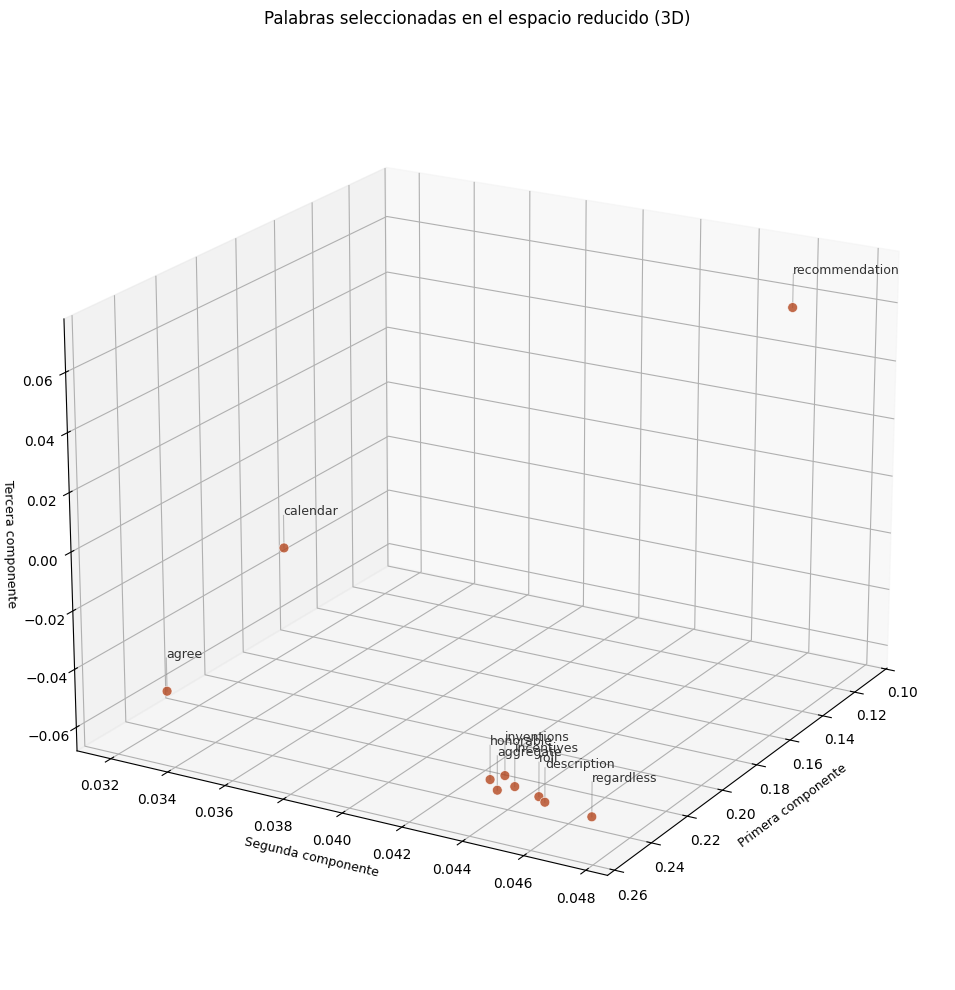

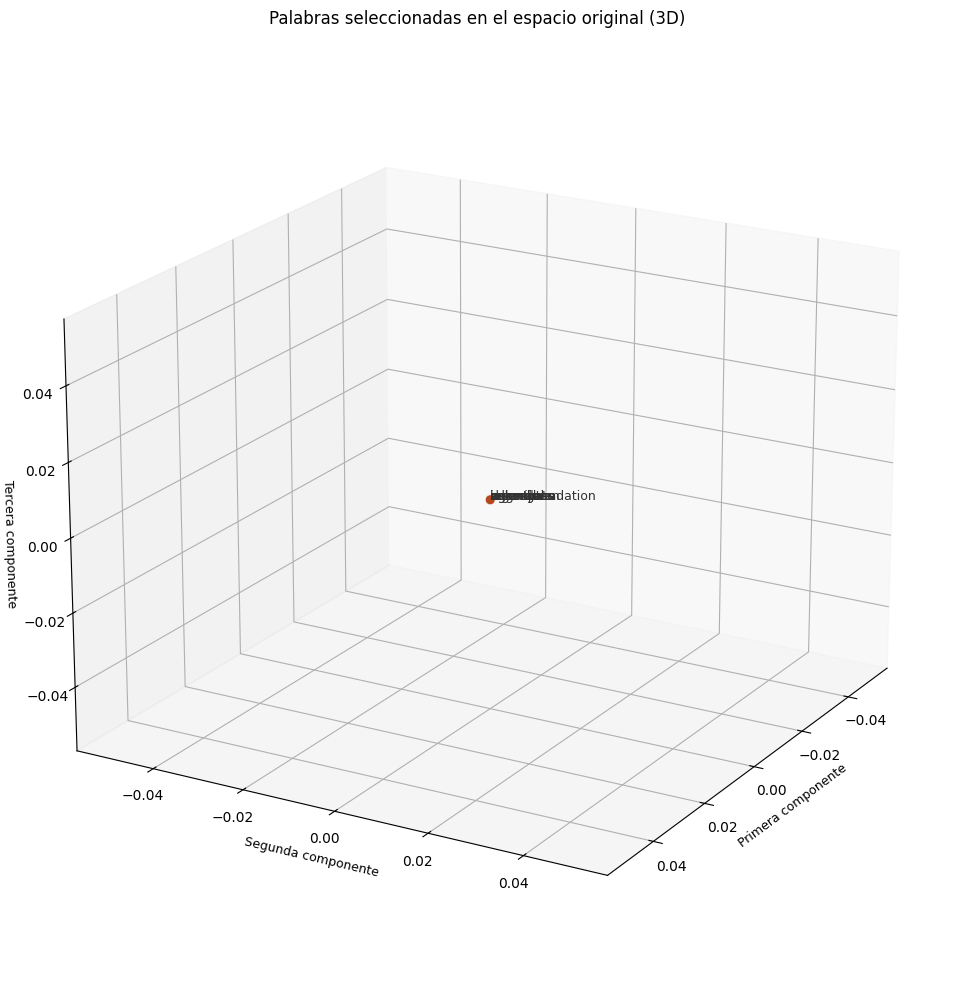

In [39]:
plot_3d_embeddings(M3_reduced_occ, word2ind_occ, selected_words, "Palabras seleccionadas en el espacio reducido (3D)")
plot_3d_embeddings(M, word2ind_occ, selected_words, "Palabras seleccionadas en el espacio original (3D)")

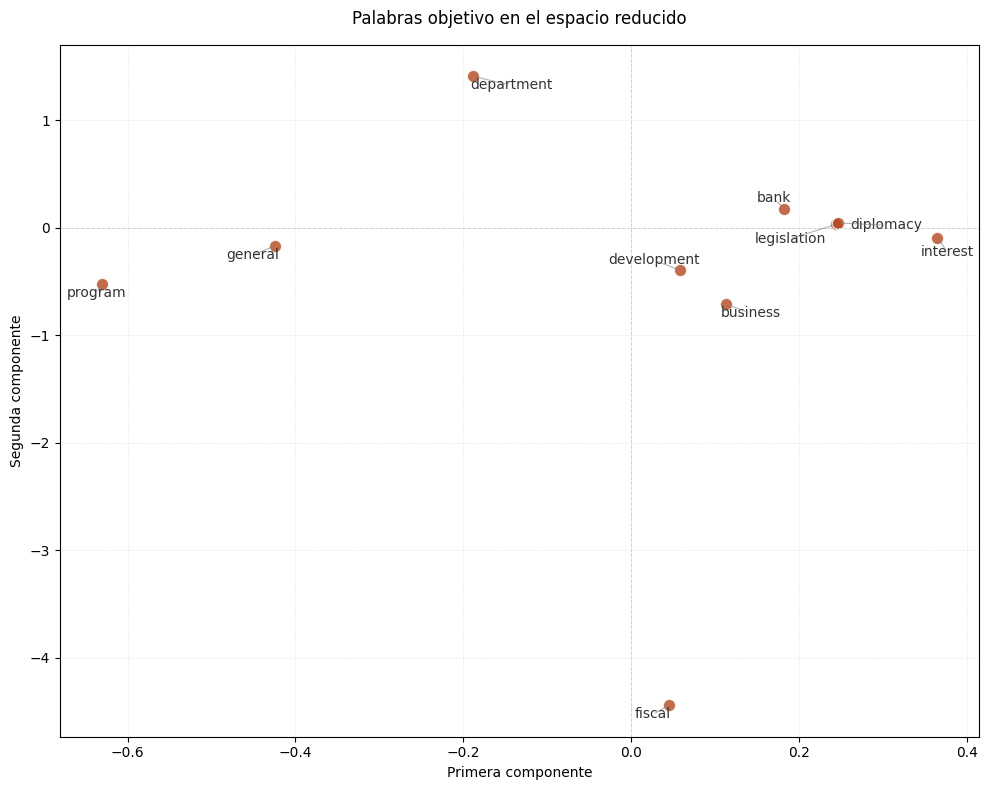

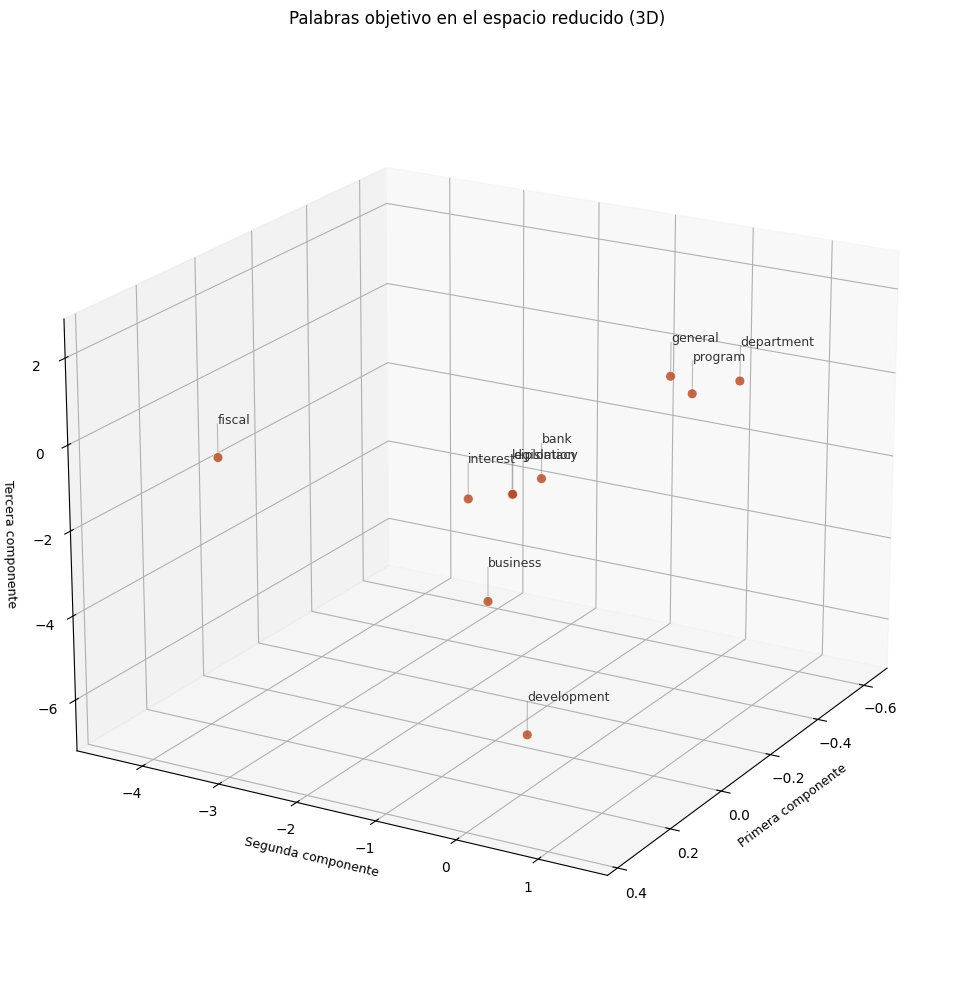

In [40]:

target_words = ["bank", "legislation", "development", "program", "business", "diplomacy", "fiscal", "department", "general", "interest"]
plot_embeddings(M_reduced_occ, word2ind_occ, target_words, "Palabras objetivo en el espacio reducido")
plot_3d_embeddings(M3_reduced_occ, word2ind_occ, target_words, "Palabras objetivo en el espacio reducido (3D)")

Ahora buscamos visualizar los embeddings producidos por Word2Vectors   

*https://medium.com/@RobuRishabh/learning-word-embeddings-with-cbow-and-skip-gram-b834bde18de4*   
*https://en.wikipedia.org/wiki/Word2vec*

In [41]:
train_brown_set = brown.sents(categories='government') #categories='government'
model_brown_wv = gensim.models.Word2Vec(
    train_brown_set,
    vector_size=100,     # Dimensión más adecuada para pocos datos
    window=3,           # Ventana reducida (oraciones cortas en government)
    min_count=1,        # Aceptar palabras con 1+ ocurrencias (para vocabulario completo)
    workers=4,
    epochs=50           # Más iteraciones para mejor aprendizaje
)

In [42]:
model_brown_wv.save('brown.embedding')
model_brown_wv_reload = gensim.models.Word2Vec.load('brown.embedding')

In [43]:
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the word vectors into a matrix M.
        Param:
            wv_from_bin: Word2Vec model object or KeyedVectors
        Return:
            M: numpy matrix shape (num words, vector_size) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    
    # Handle both Word2Vec model and KeyedVectors input
    if hasattr(wv_from_bin, 'wv'):  # It's a full Word2Vec model
        wv = wv_from_bin.wv
    else:  # Assume it's already KeyedVectors
        wv = wv_from_bin
    
    # Get vocabulary list in version-agnostic way
    if hasattr(wv, 'index_to_key'):  # Gensim 4.0+
        words = list(wv.index_to_key)
    elif hasattr(wv, 'index2word'):  # Older Gensim
        words = list(wv.index2word)
    else:
        raise AttributeError("Could not find vocabulary in the model")
    
    print("Shuffling words ...")
    random.seed(224)
    random.shuffle(words)
    words = words
    
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    
    # Add shuffled words
    for w in words:
        try:
            M.append(wv[w])  # Get vector directly
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    
    # Add required words if they weren't included
    for w in required_words:
        if w in word2ind:
            continue
        try:
            M.append(wv[w])
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            print(f"Warning: '{w}' not in vocabulary")
            continue
    
    M = np.stack(M)
    print("Done.")
    return M, word2ind

In [44]:
target_words = ["government", "legislation", "development", "program", "business", "diplomacy", "fiscal", "department", "general", "interest"]

In [45]:
M_wv, word2ind = get_matrix_of_vectors(model_brown_wv_reload,target_words)

Shuffling words ...
Putting 8181 words into word2ind and matrix M...
Done.


In [46]:
# Calcular matriz de distancias para poder aplicar MDS
M_wv_distance = cosine_distances(M_wv)

In [47]:
M_reduced_wv = classic_MDS(M_wv_distance) # Tomo 33 min 21.9 s para generar una matriz (15173,2)

In [48]:
print(M_reduced_wv.shape)
print(M_wv.shape)
print(M_wv_distance.shape)

(8181, 2)
(8181, 100)
(8181, 8181)


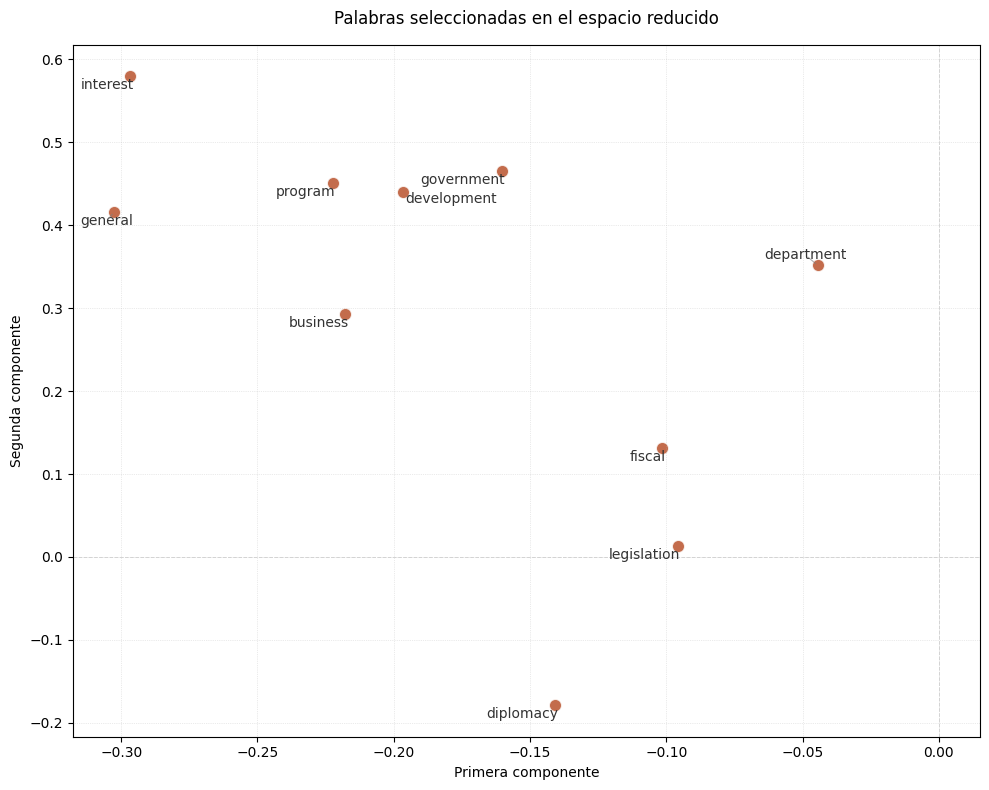

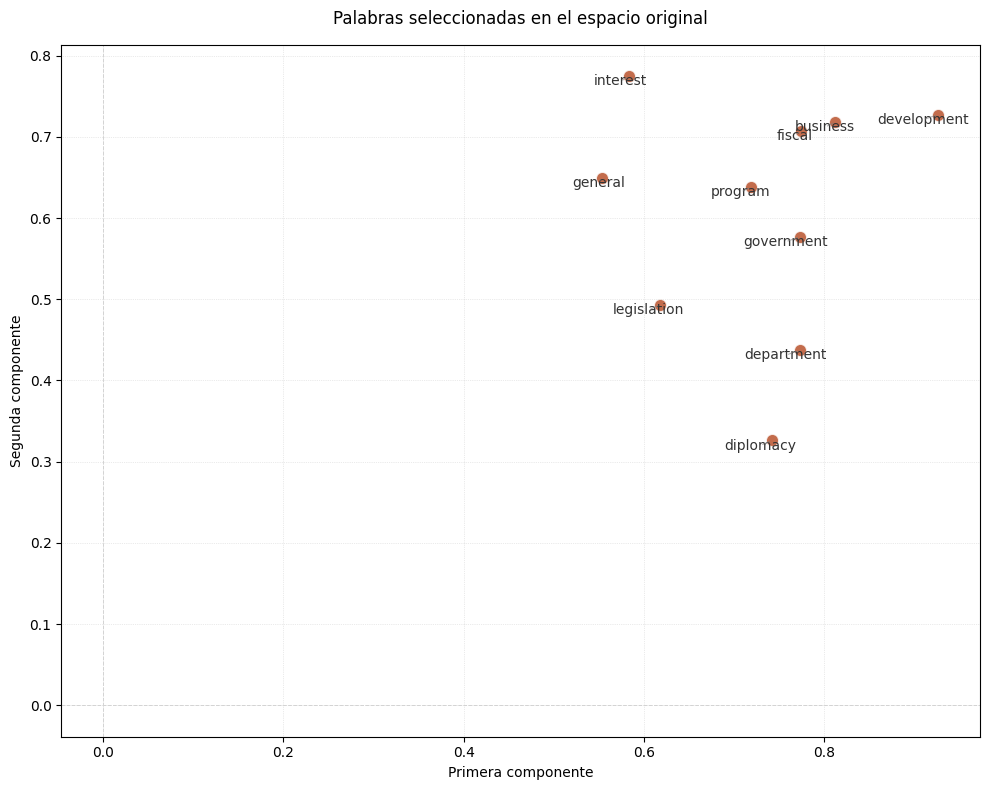

In [49]:
plot_embeddings(M_reduced_wv, word2ind, target_words, "Palabras seleccionadas en el espacio reducido")
plot_embeddings(M_wv_distance, word2ind, target_words,"Palabras seleccionadas en el espacio original")

In [50]:
M3_wv_reduced = classic_MDS(M_wv_distance, k=3)  # Aplicamos MDS clásico con 3 dimensiones

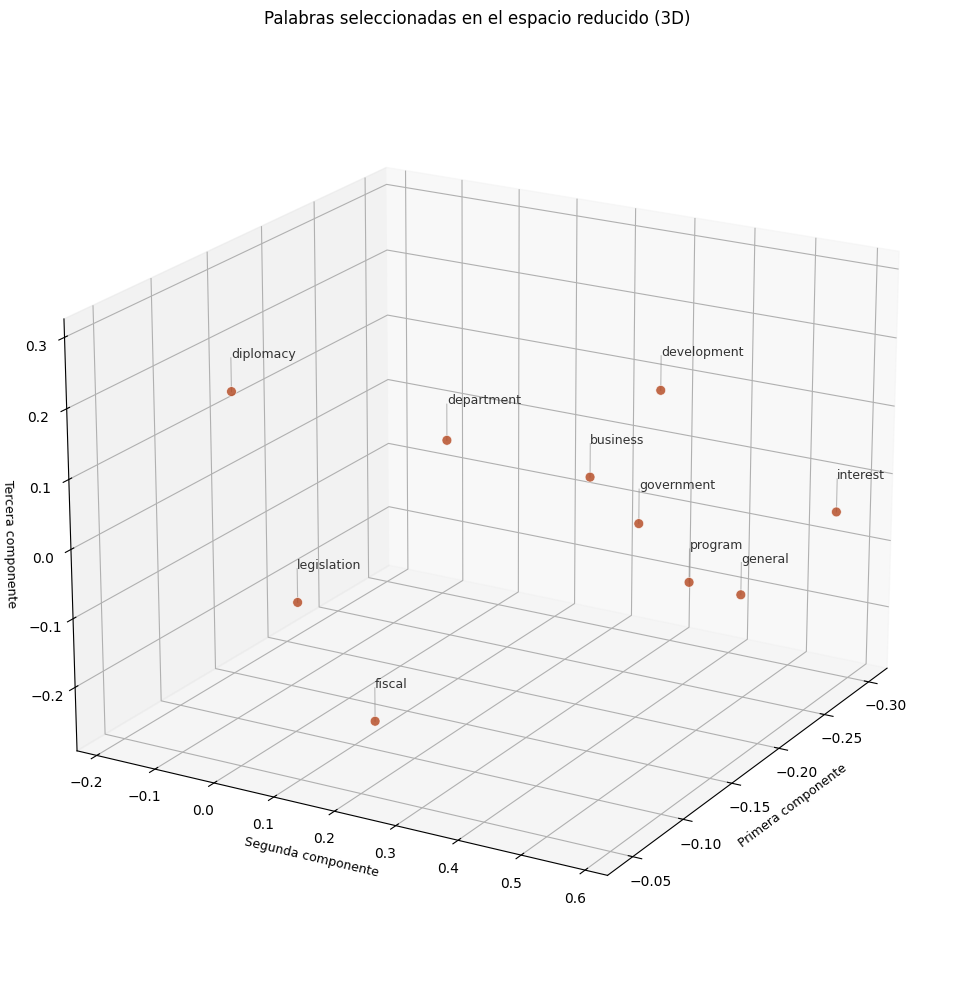

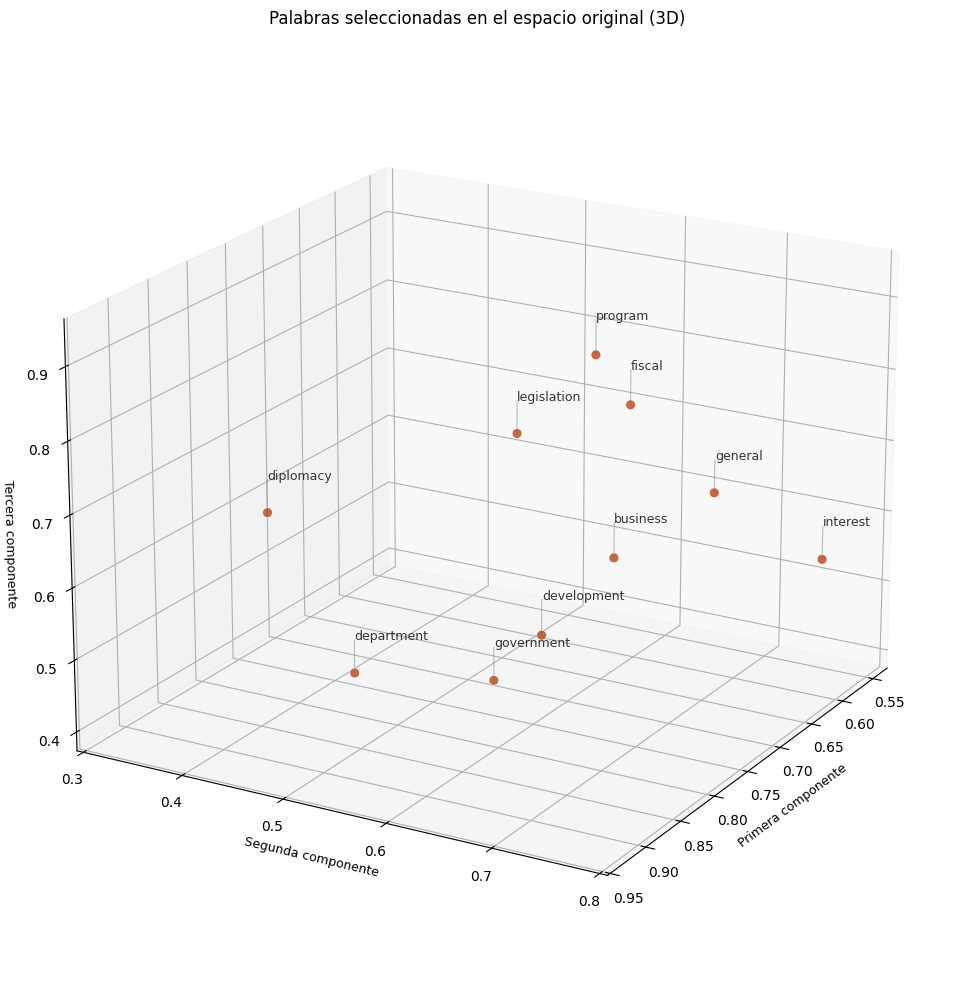

In [51]:
plot_3d_embeddings(M3_wv_reduced, word2ind, target_words, "Palabras seleccionadas en el espacio reducido (3D)")
plot_3d_embeddings(M_wv_distance, word2ind, target_words, "Palabras seleccionadas en el espacio original (3D)")

Queremos mostrar a continuación la similitud entre palabras por lo tanto calculamos sinonimos y antonimos de la palabra *'President'* con el objetivo de ver graficamente su cercania tanto con matriz de coocurrencia y Word2Vec.

In [52]:
model_brown_wv_reload.wv.most_similar(positive='President', topn=10)  # get other similar words

[('Bank', 0.7604376077651978),
 ('Kennedy', 0.7174820303916931),
 ('Export-Import', 0.7040421962738037),
 ('Justice', 0.6823259592056274),
 ('Interior', 0.6786924600601196),
 ('Secretary', 0.6724503636360168),
 ('University', 0.6700876951217651),
 ('jurisdiction', 0.6691566705703735),
 ('appointed', 0.6659365296363831),
 ('Affairs', 0.6601431965827942)]

In [53]:
model_brown_wv_reload.wv.most_similar(negative='President', topn=10)  # get other similar words

[('mechanics', 0.24938033521175385),
 ('additional', 0.24800674617290497),
 ('specialized', 0.24716095626354218),
 ('intelligent', 0.23236897587776184),
 ('Neither', 0.2152039259672165),
 ('These', 0.21483594179153442),
 ('establishments', 0.20818111300468445),
 ('formulating', 0.20486421883106232),
 ('designed', 0.19157125055789948),
 ('resources', 0.18069817125797272)]

Un paso adicional seria graficar el top 5 de palabras negaticas y el top 5 de palabras positivas para ver que las relaciones entre sinonimos y antonimos se mantienen

In [54]:
def plot_synonyms_antonyms(M_reduced, word2ind, words, title, figsize=(12, 10)):
    """
    words: Lista en formato [10 sinónimos, palabra central, 10 antónimos]
    """
    # Configuración de colores
    synonym_color = '#2ecc71'  # Verde para sinónimos
    target_color = '#3498db'    # Azul para palabra central
    antonym_color = '#e74c3c'   # Rojo para antónimos
    text_color = '#2c3e50'      # Gris oscuro para texto
    
    # Verificar estructura de entrada
    if len(words) != 21:  # 10 + 1 + 10
        raise ValueError("La lista debe contener 21 palabras (10 sinónimos + 1 central + 10 antónimos)")
    
    # Separar los grupos
    synonyms = words[:10]
    target_word = words[10]
    antonyms = words[11:]
    
    # Crear figura
    fig, ax = plt.subplots(figsize=figsize)
    
    # Obtener coordenadas
    x_coords = []
    y_coords = []
    colors = []
    
    for word in words:
        idx = word2ind[word]
        x_coords.append(M_reduced[idx, 0])
        y_coords.append(M_reduced[idx, 1])
        colors.append(synonym_color if word in synonyms else 
                     target_color if word == target_word else 
                     antonym_color)
    
    # Dibujar puntos
    ax.scatter(
        x_coords, y_coords,
        c=colors,
        s=100,
        alpha=0.9,
        edgecolors='white',
        linewidths=1.5,
        zorder=3
    )
    
    # Añadir etiquetas con fondo
    texts = []
    for i, word in enumerate(words):
        texts.append(ax.text(
            x_coords[i], y_coords[i], word,
            fontsize=10,
            ha='center',
            va='center',
            color=text_color,
            bbox=dict(
                boxstyle='round,pad=0.3',
                facecolor='white',
                edgecolor='none',
                alpha=0.8
            ),
            zorder=4
        ))
    
    # Ajustar texto para evitar solapamientos
    adjust_text(
        texts,
        only_move={'points':'y', 'text':'xy'},
        arrowprops=dict(
            arrowstyle='-',
            color='#95a5a6',
            lw=0.8,
            alpha=0.6
        ),
        expand_text=(1.2, 1.4),
        force_text=0.4,
        ax=ax
    )
    
    # Líneas conectivas (opcional)
    for i, word in enumerate(words):
        ax.plot(
            [x_coords[i], x_coords[i]],
            [y_coords[i], y_coords[i]],
            color=colors[i],
            alpha=0.3,
            linestyle='--'
        )
    
    # Leyenda
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Sinónimos',
                  markerfacecolor=synonym_color, markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label=target_word,
                  markerfacecolor=target_color, markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Antónimos',
                  markerfacecolor=antonym_color, markersize=10)
    ]
    
    ax.legend(
        handles=legend_elements,
        loc='upper right',
        frameon=True,
        framealpha=0.9
    )
    
    # Ajustes finales
    ax.set_title(title, fontsize=14, pad=20, fontweight='bold')
    ax.set_xlabel("Primera componente", fontsize=11)
    ax.set_ylabel("Segunda componente", fontsize=11)
    ax.grid(True, linestyle=':', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

In [55]:
from mpl_toolkits.mplot3d import Axes3D

def plot_synonyms_antonyms_3d(M_reduced, word2ind, words, title, figsize=(12, 10)):
    """
    words: Lista en formato [10 sinónimos, palabra central, 10 antónimos]
    M_reduced: Matriz de embeddings reducida a 3 dimensiones (n_words x 3)
    """
    # Configuración de colores
    synonym_color = '#2ecc71'  # Verde para sinónimos
    target_color = '#3498db'   # Azul para palabra central
    antonym_color = '#e74c3c'  # Rojo para antónimos
    text_color = '#2c3e50'     # Gris oscuro para texto
    
    # Verificar estructura de entrada
    if len(words) != 21:
        raise ValueError("La lista debe contener 21 palabras (10 sinónimos + 1 central + 10 antónimos)")
    
    # Separar los grupos
    synonyms = words[:10]
    target_word = words[10]
    antonyms = words[11:]
    
    # Crear figura 3D
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Obtener coordenadas 3D
    x_coords, y_coords, z_coords = [], [], []
    colors = []
    
    for word in words:
        idx = word2ind[word]
        x_coords.append(M_reduced[idx, 0])
        y_coords.append(M_reduced[idx, 1])
        z_coords.append(M_reduced[idx, 2])
        colors.append(synonym_color if word in synonyms else 
                     target_color if word == target_word else 
                     antonym_color)
    
    # Dibujar puntos 3D
    ax.scatter(
        x_coords, y_coords, z_coords,
        c=colors,
        s=60,
        alpha=0.9,
        edgecolors='white',
        linewidths=1,
        depthshade=True
    )
    
    # Añadir etiquetas con desplazamiento en Z
    text_offset = 0.1 * (max(z_coords) - min(z_coords))  # 10% del rango Z
    
    for i, word in enumerate(words):
        ax.text(
            x_coords[i], 
            y_coords[i], 
            z_coords[i] + text_offset,  # Desplazamiento para evitar solapamiento
            word,
            fontsize=9,
            color=text_color,
            zorder=10,
            bbox=dict(
                boxstyle='round,pad=0.2',
                facecolor='white',
                edgecolor='none',
                alpha=0.7
            )
        )
        
        # Línea conectiva
        ax.plot(
            [x_coords[i], x_coords[i]],
            [y_coords[i], y_coords[i]],
            [z_coords[i], z_coords[i] + text_offset * 0.8],  # Línea al 80% del texto
            color=colors[i],
            linestyle=':',
            linewidth=0.8,
            alpha=0.5
        )
    
    # Leyenda
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Sinónimos',
                  markerfacecolor=synonym_color, markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label=target_word,
                  markerfacecolor=target_color, markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Antónimos',
                  markerfacecolor=antonym_color, markersize=8)
    ]
    
    ax.legend(
        handles=legend_elements,
        loc='upper right',
        frameon=True,
        framealpha=0.9
    )
    
    # Ajustes finales
    ax.set_title(title, fontsize=14, pad=20,fontweight='bold')
    ax.set_xlabel("Primera componente", fontsize=10)
    ax.set_ylabel("Segunda componente", fontsize=10)
    ax.set_zlabel("Tercera componente", fontsize=10)
    
    # Vista inicial óptima
    ax.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    plt.show()

In [56]:
sinonimos =[sinom[0] for sinom in model_brown_wv_reload.wv.most_similar(positive='President', topn=10)] + ['president']  + [anton[0] for anton in model_brown_wv_reload.wv.most_similar(negative='president', topn=10)] 

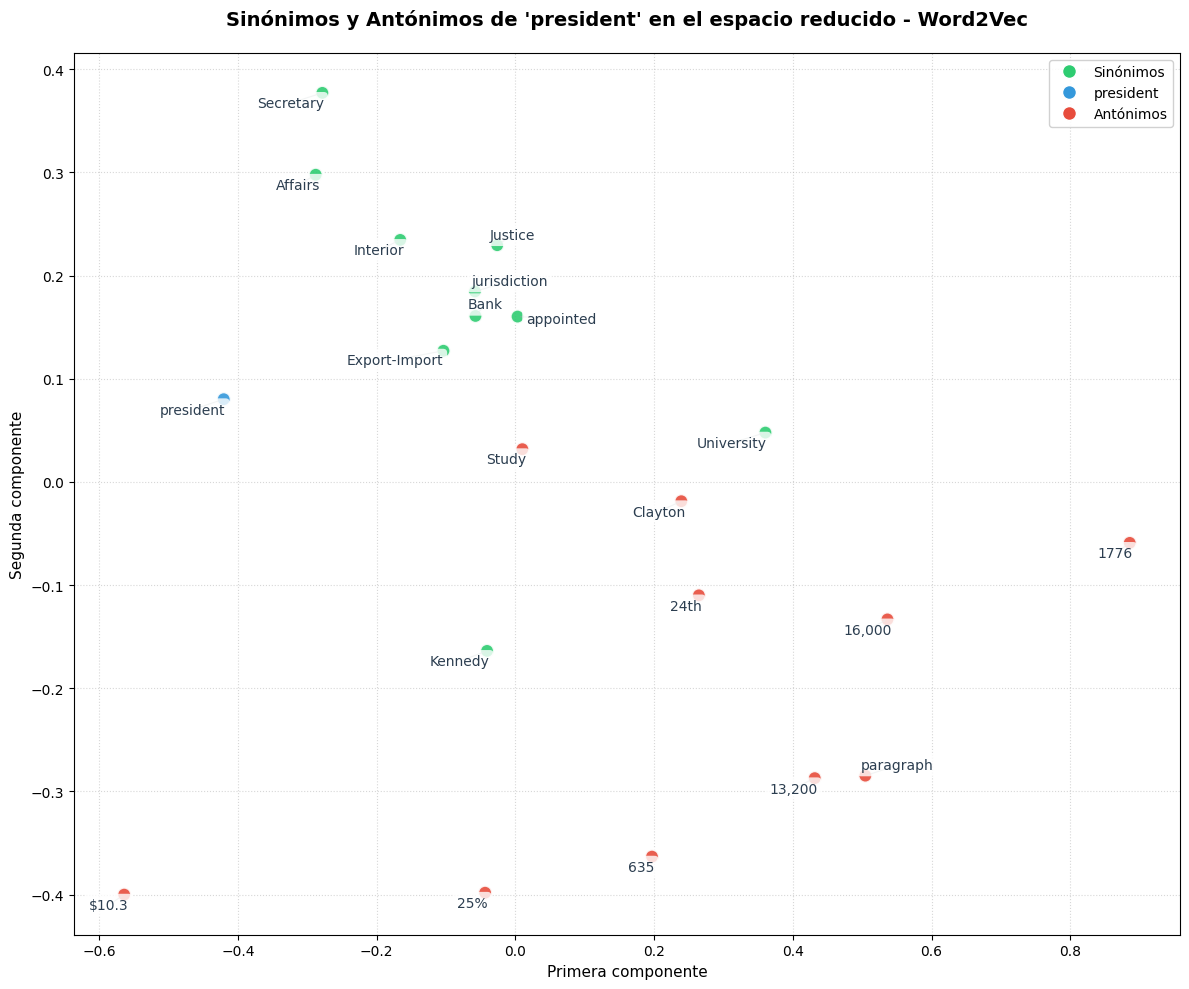

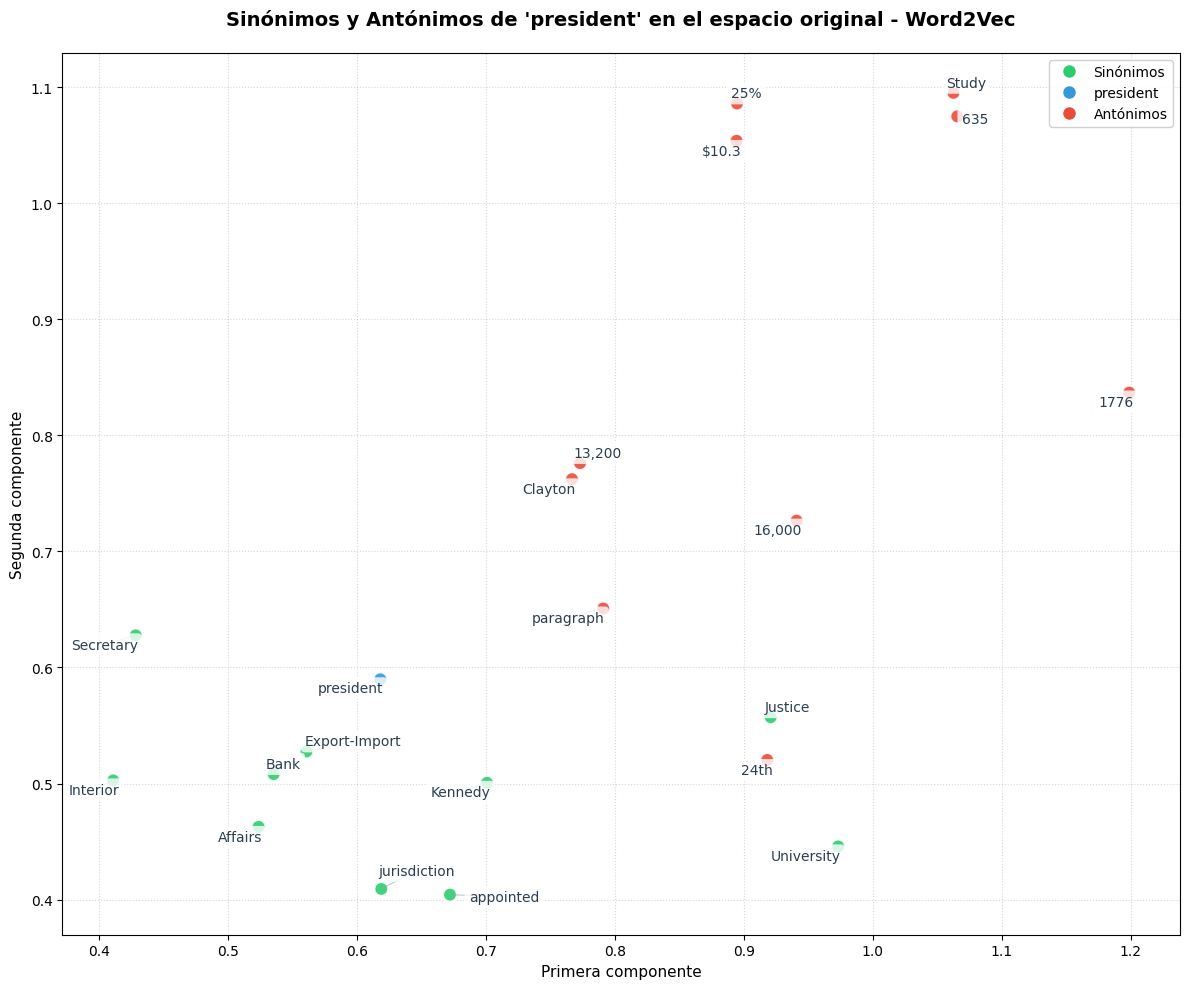

In [57]:
plot_synonyms_antonyms(M_reduced_wv, word2ind, sinonimos, "Sinónimos y Antónimos de 'president' en el espacio reducido - Word2Vec")
plot_synonyms_antonyms(M_wv_distance, word2ind, sinonimos, "Sinónimos y Antónimos de 'president' en el espacio original - Word2Vec")

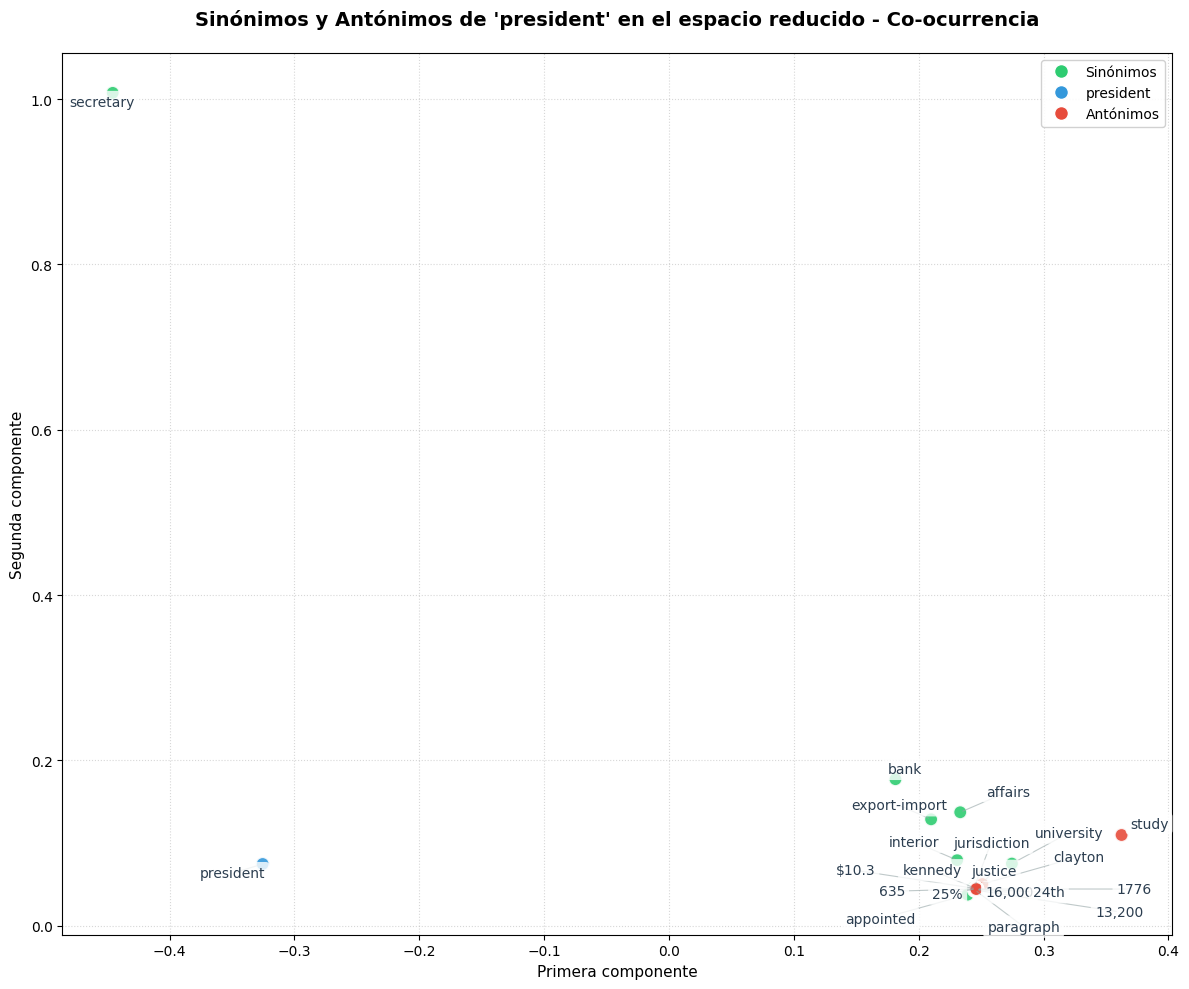

0 [-0.728 -0.583]
1 [-0.68  -0.331]
2 [0.32  0.291]
3 [ 0.455 -0.291]
4 [0.918 0.776]
5 [-0.371  0.644]
6 [-0.392 -0.482]
7 [-0.928 -0.59 ]
8 [-0.247  0.161]
9 [0.318 0.11 ]
10 [-0.893  0.584]
11 [ 0.747 -0.894]
12 [-0.343 -0.417]
13 [ 0.935 -0.225]
14 [ 0.732 -0.522]
15 [ 0.9   -0.031]
16 [ 0.071 -0.725]
17 [-0.477  0.258]
18 [-0.796 -0.96 ]
19 [ 0.645 -0.475]
20 [-0.992  0.095]


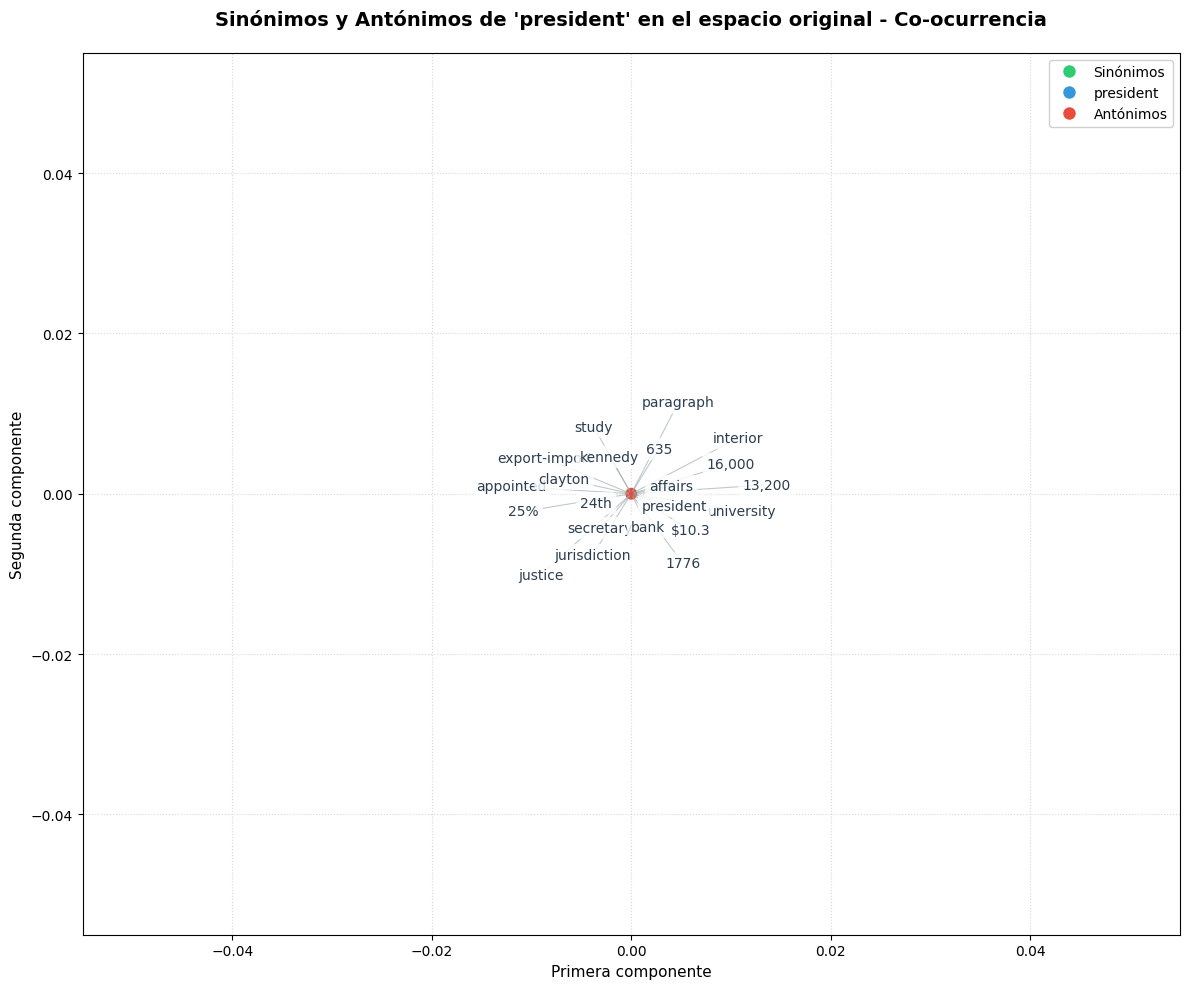

In [58]:
palabras_case_sensitive = ['secretary','interior','bank','affairs','export-import','jurisdiction','kennedy','appointed','university','justice','president','paragraph','16,000'
                           ,'clayton','13,200','1776','$10.3','25%','635','study','24th']
plot_synonyms_antonyms(M_reduced_occ, word2ind_occ, palabras_case_sensitive, "Sinónimos y Antónimos de 'president' en el espacio reducido - Co-ocurrencia")
plot_synonyms_antonyms(M, word2ind_occ, palabras_case_sensitive, "Sinónimos y Antónimos de 'president' en el espacio original - Co-ocurrencia")


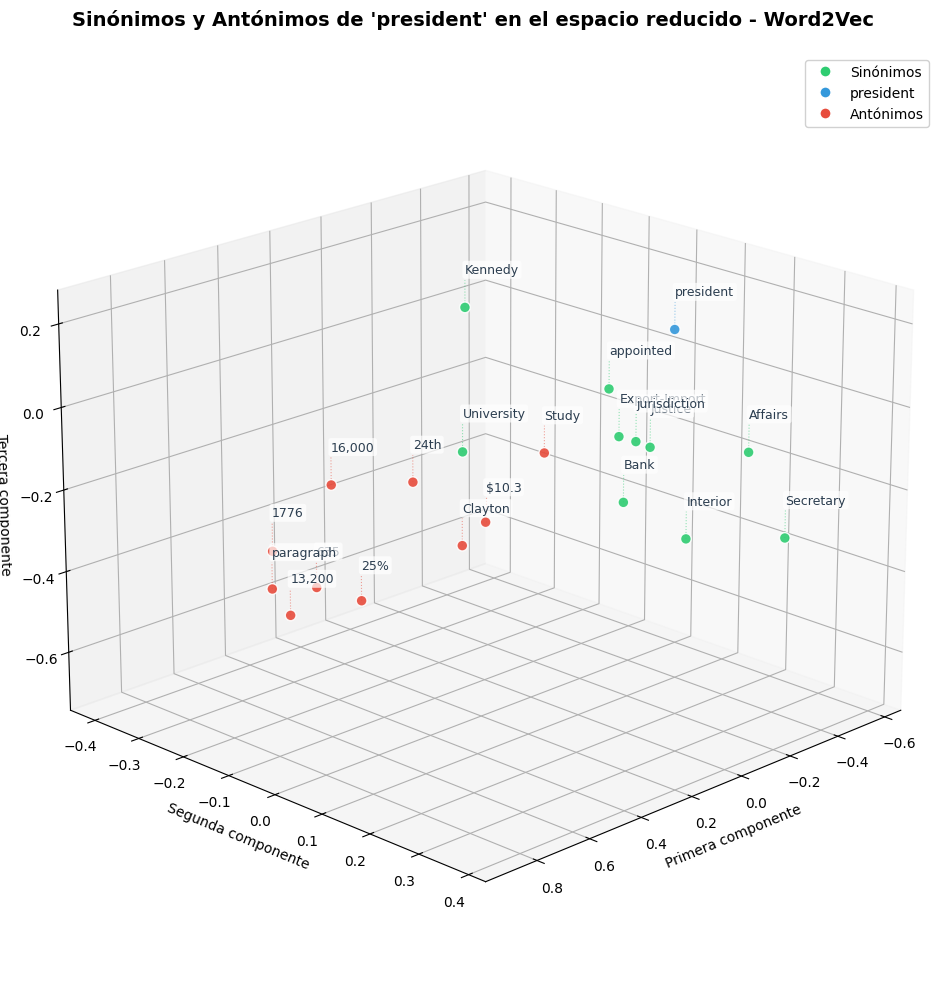

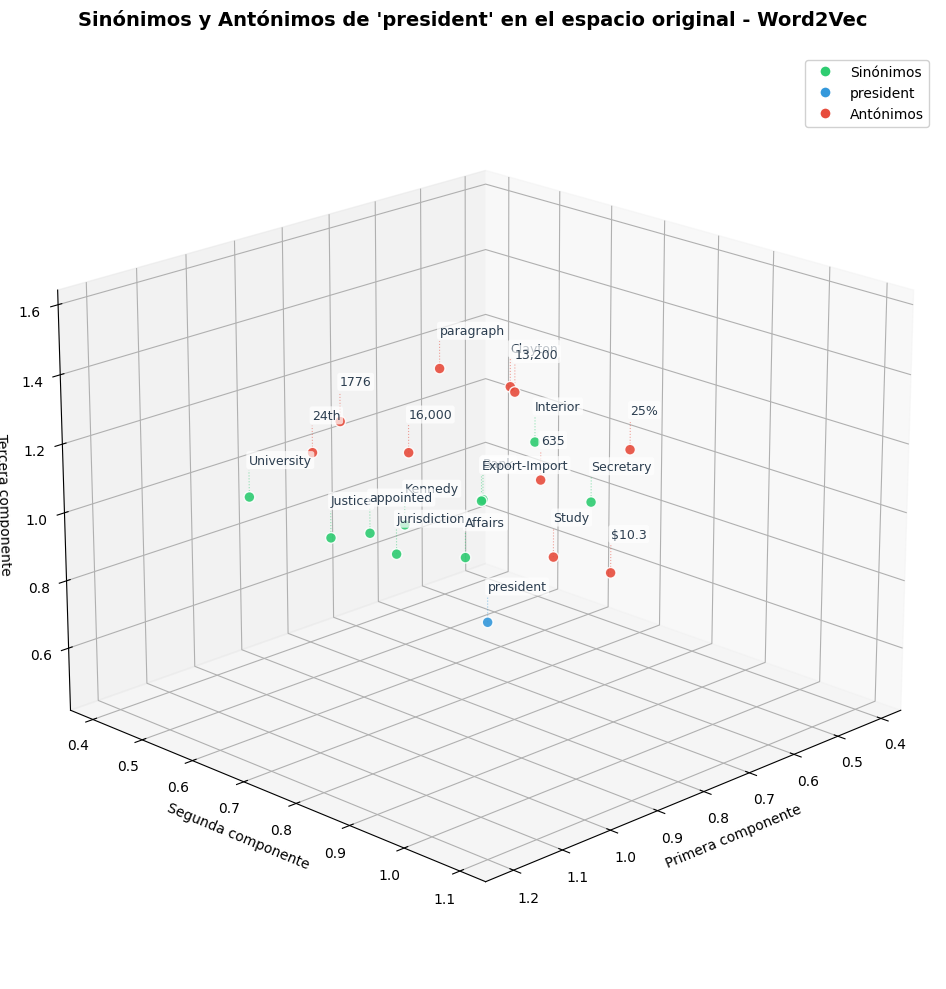

In [59]:
plot_synonyms_antonyms_3d(M3_wv_reduced, word2ind, sinonimos, "Sinónimos y Antónimos de 'president' en el espacio reducido - Word2Vec")
plot_synonyms_antonyms_3d(M_wv_distance, word2ind, sinonimos, "Sinónimos y Antónimos de 'president' en el espacio original - Word2Vec")

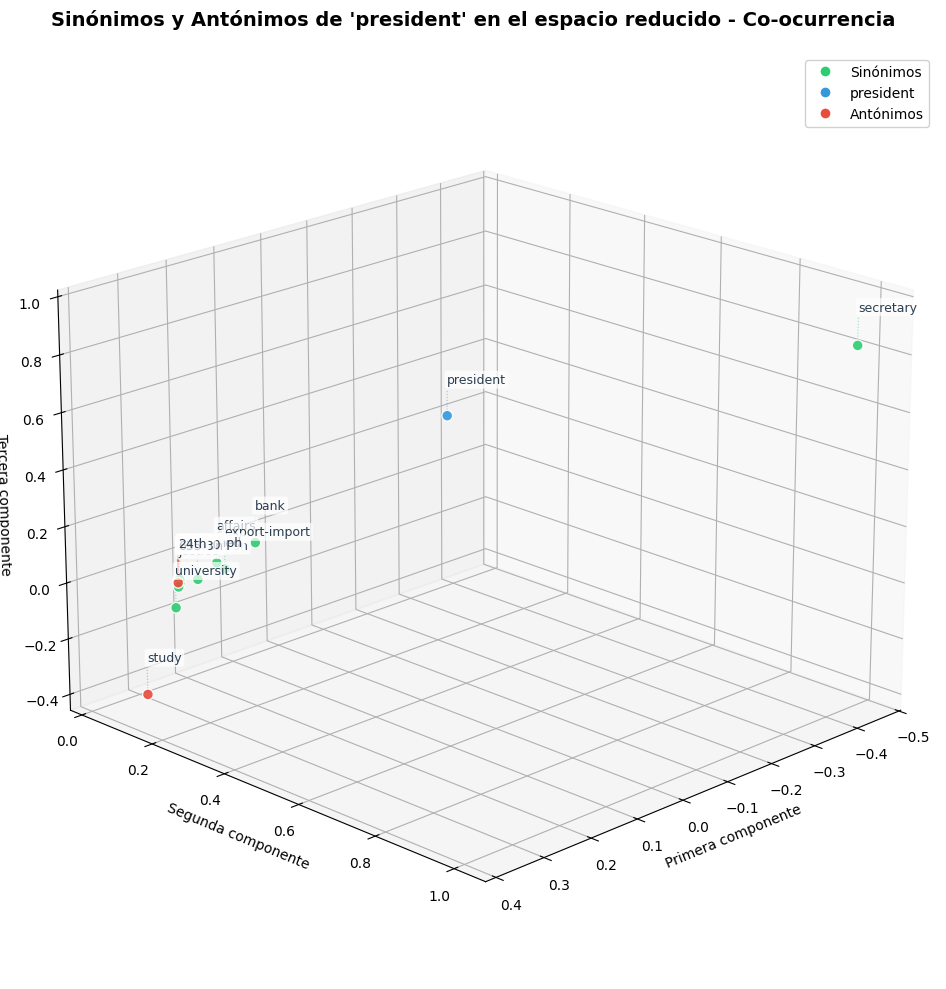

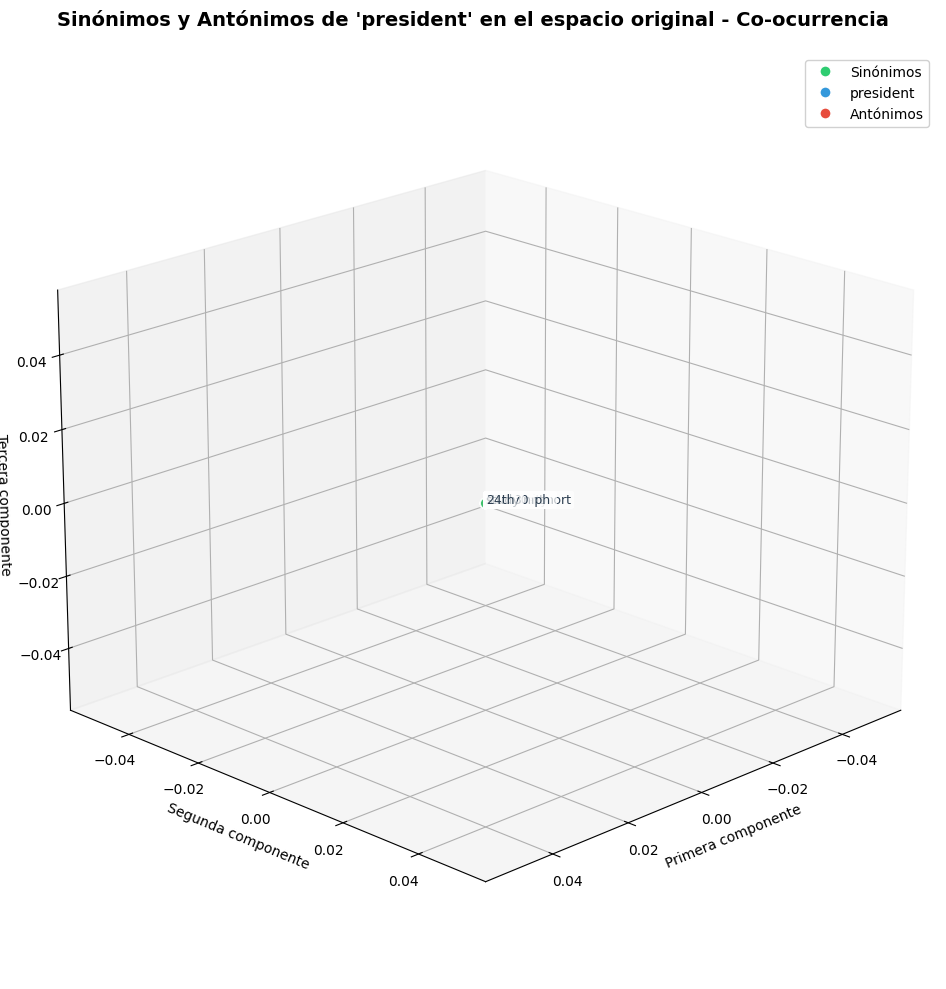

In [60]:
plot_synonyms_antonyms_3d(M3_reduced_occ, word2ind_occ, palabras_case_sensitive, "Sinónimos y Antónimos de 'president' en el espacio reducido - Co-ocurrencia")
plot_synonyms_antonyms_3d(M, word2ind_occ, palabras_case_sensitive, "Sinónimos y Antónimos de 'president' en el espacio original - Co-ocurrencia")


Realizamos la validación y evalución de la reducción realizada.

Stress: 0.4785


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



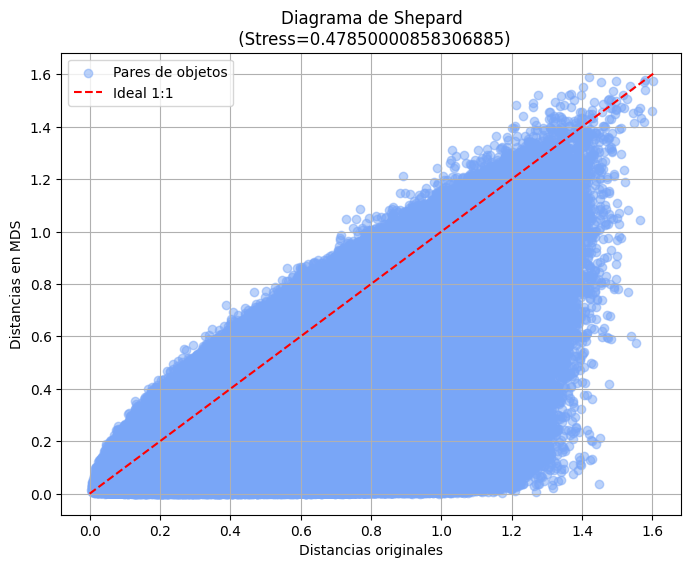

In [61]:
distancias_originales = M_wv_distance   
distancias_reducidas = pairwise_distances(M_reduced_wv)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

Stress: 0.3655


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



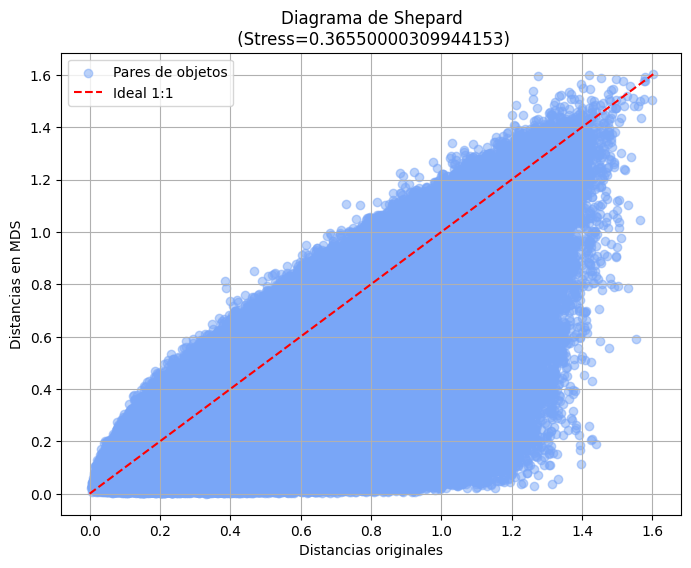

In [62]:
distancias_originales = M_wv_distance   
distancias_reducidas = pairwise_distances(M3_wv_reduced)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

In [63]:
M4_wv_reduced = classic_MDS(M_wv_distance, k=4)  # Aplicamos MDS clásico con 4 dimensiones

Stress: 0.2928


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



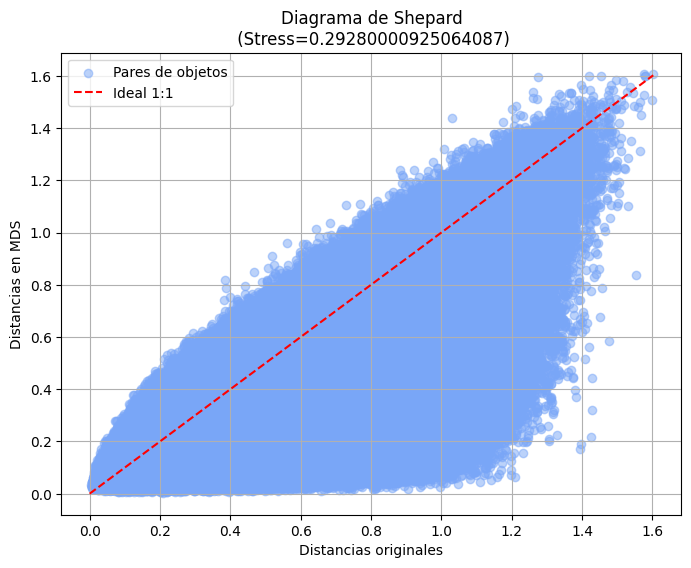

In [64]:
distancias_originales = M_wv_distance   
distancias_reducidas = pairwise_distances(M4_wv_reduced)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

In [65]:
M5_wv_reduced = classic_MDS(M_wv_distance, k=5)  # Aplicamos MDS clásico con 4 dimensiones

Stress: 0.2385


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



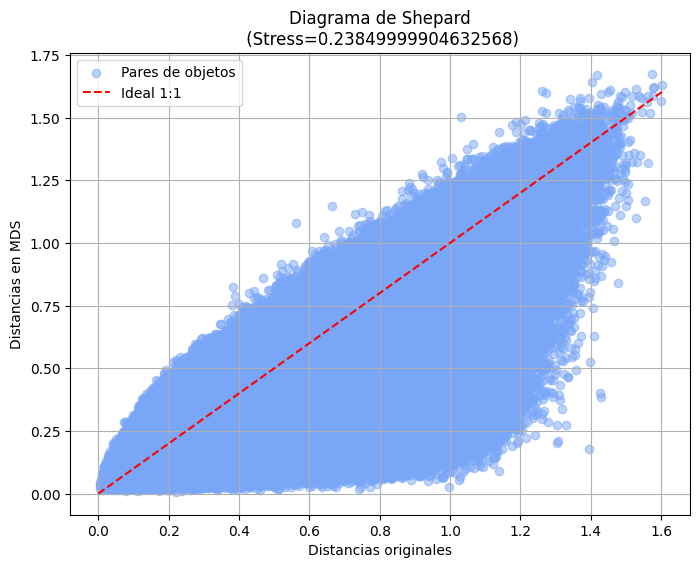

In [66]:
distancias_originales = M_wv_distance   
distancias_reducidas = pairwise_distances(M5_wv_reduced)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

In [67]:
M6_wv_reduced = classic_MDS(M_wv_distance, k=6) 
distancias_originales = M_wv_distance   
distancias_reducidas = pairwise_distances(M6_wv_reduced)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

Stress: 0.1955


- _https://radimrehurek.com/gensim/models/word2vec.html_
- _https://www.nltk.org/data.html_
- _https://www.nltk.org/howto/gensim.html_
- _https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5/_   
- _https://comet.arts.ubc.ca/docs/4_Advanced/advanced_word_embeddings/advanced_word_embeddings_python_version.html_


### **Posibles casos de uso**
 - análisis de redes sociales (ARS) - estudiar las interacciones y relaciones dentro de las redes sociales entre usuarios.   
 *investigación social: estudiar estructuras sociales con propositos de difusión de información.*
 - análisis de datos cientificos (Para analizar datos complejos, como los de clima, oceanografía o biología, y extraer información relevante) Poddría buscar una aplicación en biología sobre la representación de parientes en alguna especie o algo similar. - __*Taxonomy and Phylogeny*__
- análisis multidimencional en el procesamiento de imagenes

### **Procesamiento de imagenes**
- Método de clasificación de imagenes usando MDS   
*https://sci-hub.se/https://ieeexplore.ieee.org/document/8927296* - Paper principal   
*https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8781229* - Paper implementación clasificación imagenes (Transformada Wavelet)   
*https://medium.com/@koushikc2000/2d-discrete-wavelet-transformation-and-its-applications-in-digital-image-processing-using-matlab-1f5c68672de3*

**Pasos implementación**
- Carga de la imagen en escala de grises.
- Particionar las imagenes en 64 (independiente, no sobrepuestas) $2^6 × 2^6$ celdas.
- Aplicar la transformada de Wavelet a cada celda.
- Extraer features estadisticas basicas de cada celda.
- Concatenar las features en un arreglo obteniendo el vector caracteriztico.
- Concatenar los vectores caracterizticos de todas las imagenes en una matriz y aplicar MDS.


In [68]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
import pywt
from scipy.stats import kurtosis, skew
from matplotlib.lines import Line2D
from skimage import data
import imageio
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from skimage.util import random_noise
from skimage import img_as_float

El ruido gaussiano sigue una distribución normal (campana de Gauss), donde la media indica el valor "central" del ruido (hacia dónde se desplazan los píxeles en promedio) y la desviacion controla cuánto varían los valores del ruido (qué tan "dispersos" son).

In [69]:
def text_watermark(imagen, texto, tamano=50):
    if imagen.dtype != np.uint8:
        imagen = (imagen * 255).clip(0, 255).astype(np.uint8)

    imagen_pil = Image.fromarray(imagen)
    if imagen_pil.mode != 'RGB':
        imagen_pil = imagen_pil.convert('RGB')

    draw = ImageDraw.Draw(imagen_pil)

    try:
        fuente = ImageFont.truetype("arial.ttf", tamano)
    except:
        fuente = ImageFont.load_default()

    posicion = (imagen_pil.width // 4, imagen_pil.height // 4)

    # Dibujar el contorno (texto negro un poco desplazado)
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx != 0 or dy != 0:
                draw.text((posicion[0] + dx, posicion[1] + dy), texto, font=fuente, fill=(0, 0, 0))

    # Texto principal (blanco)
    draw.text(posicion, texto, font=fuente, fill=(255, 255, 255))

    return np.array(imagen_pil)

In [91]:
def tranformada_Wavelet(cell, wavelet='db2', level=3):
    coeffs = pywt.wavedec2(cell, wavelet=wavelet, level=level)
    features = []
    
    # Extraemos características de las sub-bandas
    # cA es la aproximación, cH, cV, cD son las sub-bandas de detalle
    for j in range(1, level+1):
        (cH, cV, cD) = coeffs[j]
        for coef in [cH, cV, cD]:
            flat = coef.flatten()
            features.extend([
                np.mean(flat),
                np.var(flat),
                skew(flat),
                kurtosis(flat),
                np.min(flat),
                np.max(flat),
                np.median(flat),
                np.percentile(flat, 25),
                np.percentile(flat, 75),
                np.std(flat)
            ])
    return features  # 3 orientaciones *3 niveles * 10 estadisticas = 90

def extract_image_features(img, lv = 3):

    features = []
    for i in range(0, 208, 26):
        for j in range(0, 208, 26):
            cell = img[i:i+26, j:j+26]
            cell_features = tranformada_Wavelet(cell, level=lv)
            features.extend(cell_features)
    
    return np.array(features)  # Debería tener 64 * 150 = 9600 dimensiones

**Distancia de Hausdorff**  
Métrica definida entre dos conjuntos de vectores.  
Distancias entre dos subconjuntos compactos de un espacio métrico. Sea $X$ y $Y$ dos conjuntos de puntos, la distancia de Hausdorff entre dos conjuntos esta dado por,
$$ d_H(X,Y) = max(h(X,Y),h(Y,X))$$ 
donde $h(X,Y) = max_{x\in X} (min_{y \in Y}||x-y||)$

In [85]:
from scipy.spatial.distance import directed_hausdorff

# distancia para construir la matriz de distancias para el MDS
def hausdorff_distance(matrix):
    """Calcula la distancia de Hausdorff entre los vectores de una matriz"""

    hausdorff_matrix = np.zeros((matrix.shape[0], matrix.shape[0]))
    for vec_i in range(matrix.shape[0]):
        for vec_j in range(matrix.shape[0]):
            if vec_i != vec_j:
                # Calculamos la distancia de Hausdorff entre los vectores
                h_xy = directed_hausdorff(matrix[vec_i].reshape(-1, 1), matrix[vec_j].reshape(-1, 1))[0]
                h_yx = directed_hausdorff(matrix[vec_j].reshape(-1, 1), matrix[vec_i].reshape(-1, 1))[0]
                hausdorff_matrix[vec_i, vec_j] = max(h_xy, h_yx)
            else:
                hausdorff_matrix[vec_i, vec_j] = 0
    return hausdorff_matrix

Cargamos las imagenes en blanco y negro que vamos a usar y a procesar posterior a aplicar el método,

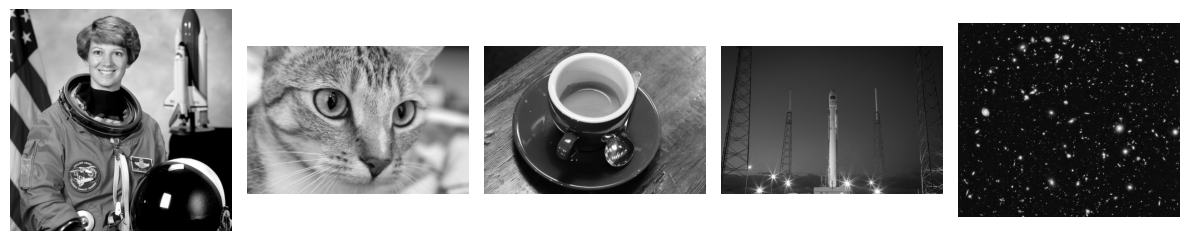

In [86]:
# Cargar todas las imágenes BW
images = [
    rgb2gray(data.astronaut()),
    rgb2gray(data.chelsea()),
    rgb2gray(data.coffee()),
    rgb2gray(data.rocket()),
    rgb2gray(data.hubble_deep_field()),
]

# Visualización
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for ax, img in zip(axes.flat, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

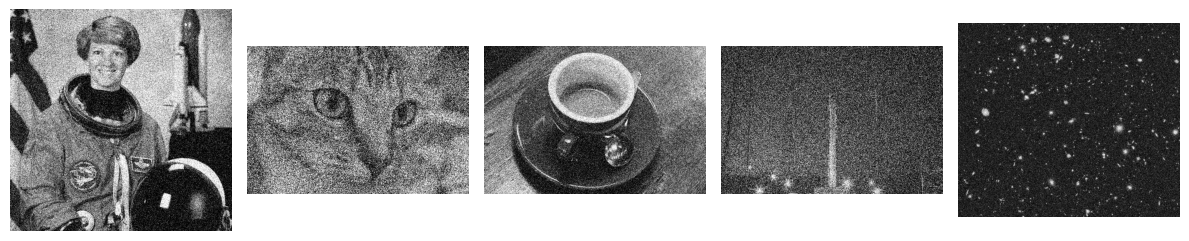

In [134]:
# Asegura que todas las imágenes estén en formato float para que el ruido funcione bien
images_float = [img_as_float(img) for img in images]

# Aplica un tipo diferente de ruido a cada imagen
images_noise = [
    random_noise(images_float[0], mode='gaussian', var=0.045),
    random_noise(images_float[1], mode='gaussian', var=0.1),
    random_noise(images_float[2], mode='gaussian', var=0.05),
    random_noise(images_float[3], mode='gaussian', var=0.15),
    random_noise(images_float[4], mode='gaussian', var=0.07),
]

# Visualización
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for ax, img in zip(axes.flat, images_noise):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


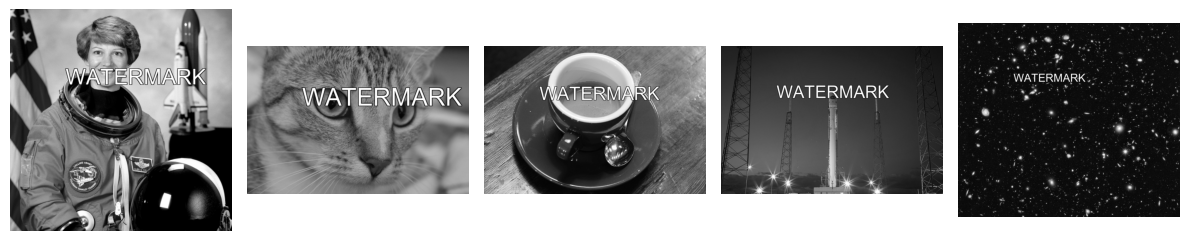

In [135]:
images_watermark = [text_watermark(img,'WATERMARK') for img in images]

# Visualización
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for ax, img in zip(axes.flat, images_watermark):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [139]:
img_features_matriz = []  # Inicializamos la matriz de características
imagenes = images + images_noise  + images_watermark #images_watermark  # Combinamos las imágenes originales, con ruido y con watermark
for i in range(len(imagenes)):
    features = extract_image_features(imagenes[i])
    img_features_matriz.append(features)
img_features_matriz = np.array(img_features_matriz)
print(img_features_matriz)

c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 3 is too high: all coefficients will experience boundary effects.



[[ -0.018   0.259  -0.798 ...  -0.004   0.004   0.013]
 [  0.01    0.002   0.555 ...  -0.025   0.026   0.04 ]
 [ -0.      0.     -0.75  ...  -0.004   0.005   0.029]
 ...
 [  0.255  26.948   0.745 ...  -0.      0.      0.   ]
 [ -0.061   3.008   0.201 ...  -0.      0.      0.   ]
 [  0.444 200.132   0.622 ...  -0.      0.      0.   ]]


In [92]:
M_img = hausdorff_distance(img_features_matriz)

In [93]:
M_reduced_img = classic_MDS(M_img)
M_reduced_img


array([[-38815.264,    141.857],
       [-38872.467,    142.111],
       [-38813.466,    141.849],
       [-38839.823,    141.966],
       [-38838.441,    141.96 ],
       [-38873.45 ,    142.116],
       [-38877.536,    142.134],
       [-38877.474,    142.134],
       [-38878.755,    142.139],
       [-38876.138,    142.128],
       [104406.286,  15079.4  ],
       [153314.997,   -711.756],
       [ 55678.63 ,   -277.969],
       [ 89687.317, -15544.006],
       [-14524.417,     33.936]])

In [94]:
def plot_embeddings_img(M_reduced, labels, color_map, figsize=(8, 8)):

    # Normalizar coordenadas para visualización (sin alterar datos originales)
    coords_normalized = M_reduced / np.max(np.abs(M_reduced), axis=0)  # Escala [-1, 1] por columna
    
    # Configurar figura
    plt.figure(figsize=figsize)
    colors = [color_map.get(label[0], 'gray') for label in labels]
    
    # Scatter plot
    plt.scatter(coords_normalized[:, 0], coords_normalized[:, 1], c=colors, s=80, alpha=0.7)
    
    # Añadir etiquetas con adjust_text
    texts = []
    for (x, y), label, color in zip(coords_normalized, labels, colors):
        texts.append(plt.text(x, y, label, fontsize=10, color='gray', ha='center', va='center'))
    
    adjust_text(texts, 
               arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.6),
               expand_points=(1.5, 1.5))  # Mayor separación
    
    # Ajustar ejes y leyenda
    plt.title('Clasificación de imagenes en el espacio reducido - MDS', pad=20)
    plt.xlabel('Primera componente')
    plt.ylabel('Segunda componente')
    plt.grid(True, linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

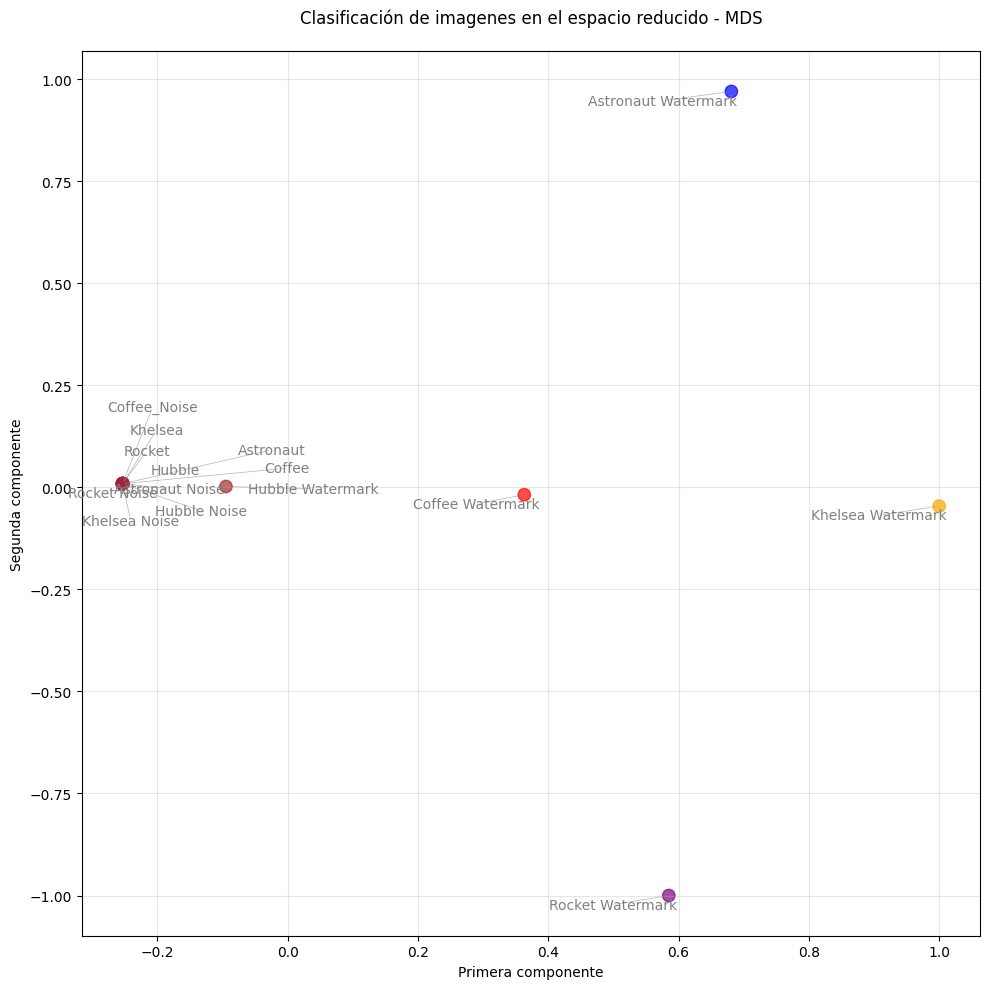

In [95]:
labels = ['Astronaut', 'Khelsea', 'Coffee', 'Rocket', 'Hubble',
          'Astronaut Noise', 'Khelsea Noise', 'Coffee_Noise','Rocket Noise','Hubble Noise',
          'Astronaut Watermark', 'Khelsea Watermark', 'Coffee Watermark', 'Rocket Watermark', 'Hubble Watermark']

color_map = {
    'A': 'blue',
    'K': 'orange',
    'C':'red',
    'R': 'purple',   
    'H': 'brown'
}

plot_embeddings_img(M_reduced_img, labels, color_map, figsize=(10, 10))

Validación y evaluación de la clasificación (reducción)

Stress: 0.0056


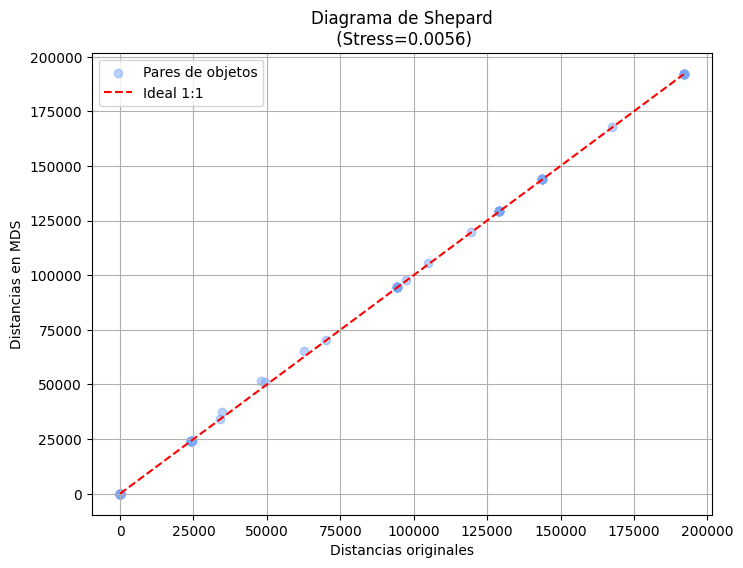

In [96]:
distancias_originales = M_img   
distancias_reducidas = pairwise_distances(M_reduced_img)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

In [97]:
M3_reduced_img = classic_MDS(M_img,3)
M3_reduced_img

array([[-38814.885,    141.854,     -0.   ],
       [-38872.089,    142.109,     -0.   ],
       [-38813.087,    141.846,     -0.   ],
       [-38839.444,    141.964,      3.276],
       [-38838.062,    141.957,     -3.276],
       [-38876.409,    142.128,     -0.   ],
       [-38877.362,    142.132,     -0.   ],
       [-38877.543,    142.133,     -0.   ],
       [-38877.822,    142.134,     -0.   ],
       [-38878.004,    142.135,     -0.   ],
       [104406.665,  15079.401,      0.   ],
       [153315.374,   -711.753,      0.   ],
       [ 55679.008,   -277.968,      0.   ],
       [ 89687.698, -15544.005,      0.   ],
       [-14524.038,     33.934,     -0.   ]])

In [98]:
def plot_3d_embeddings_img(M_reduced, labels, color_map, figsize=(10, 10)):
    # Normalización por columna
    coords_normalized = M_reduced / np.max(np.abs(M_reduced), axis=0)
    colors = [color_map.get(label[0], 'gray') for label in labels]
    
    # Crear figura 3D
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot 3D
    scatter = ax.scatter(
        coords_normalized[:, 0], 
        coords_normalized[:, 1], 
        coords_normalized[:, 2], 
        c=colors, s=80, alpha=0.7
    )
    
    # Añadir etiquetas y líneas conectoras
    for i, (x, y, z) in enumerate(coords_normalized):
        label = labels[i]
        color = colors[i]
        
        # Posición de la etiqueta (ligeramente desplazada en z)
        label_z = z + 0.2 * np.max(np.abs(coords_normalized[:, 2]))
        
        # Añadir etiqueta
        ax.text(x, y, label_z, label, 
                color='gray', 
                fontsize=9, 
                ha='center', 
                va='bottom')
        
        # Añadir línea conectora
        ax.plot([x, x], [y, y], [z, label_z], 
                color='gray', 
                linestyle=':', 
                alpha=0.5, 
                linewidth=0.7)
    
    # Configuración de ejes
    ax.set_title('Clasificación de imagenes en el espacio reducido - MDS', pad=20)
    ax.set_xlabel('Primera componente')
    ax.set_ylabel('Segunda componente')
    ax.set_zlabel('Tercera componente')
    ax.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

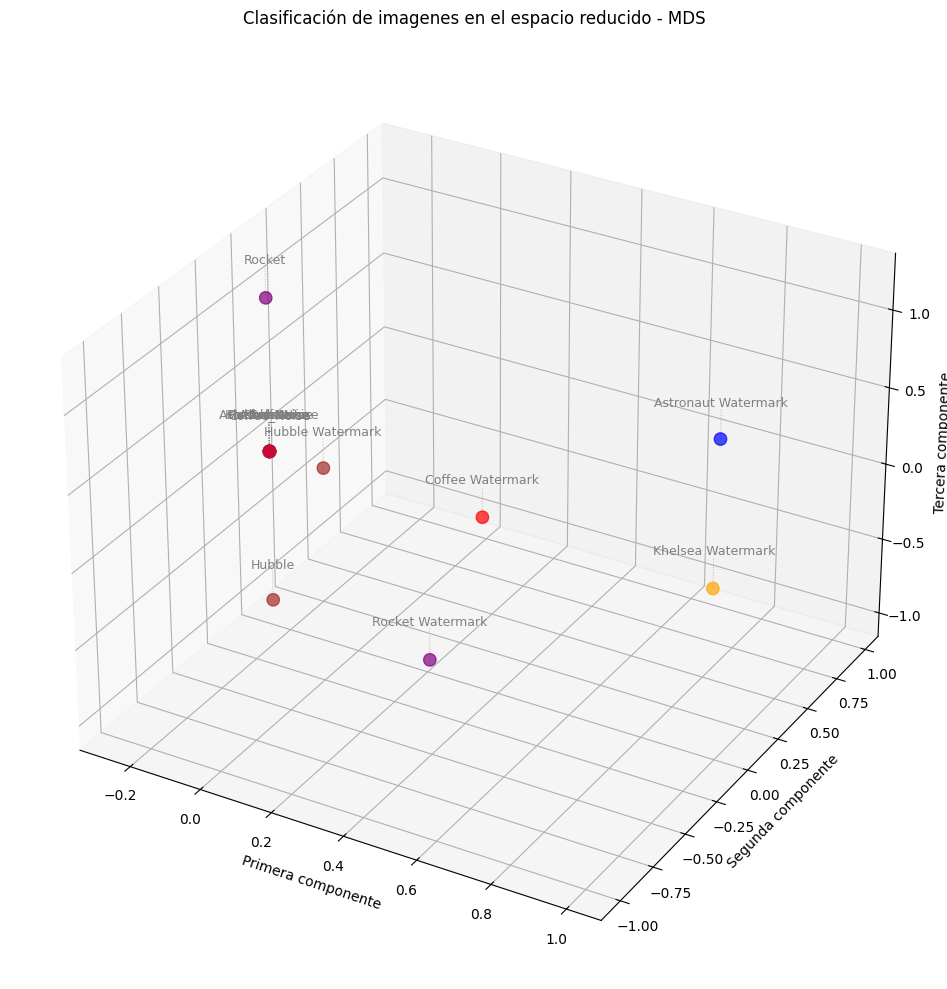

In [99]:
plot_3d_embeddings_img(M3_reduced_img, labels, color_map)

Stress: 0.0056


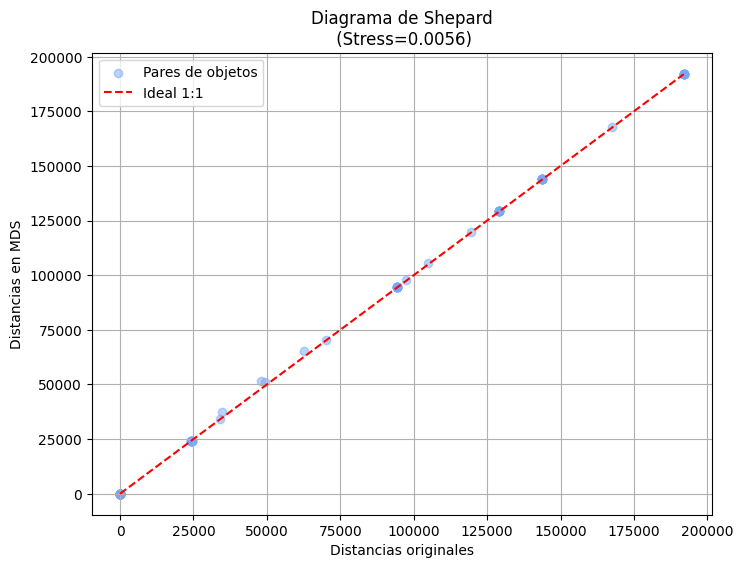

In [100]:
distancias_originales = M_img   
distancias_reducidas = pairwise_distances(M3_reduced_img)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

**Obtención de datos(tabla)**

In [101]:
imagenes = images #images_watermark  # Combinamos las imágenes originales, con ruido y con watermark

for level in [1, 2, 3, 4, 5]:
    print(f"Extrayendo características de las imágenes con nivel de wavelet {level}...")
    img_features_matriz = []  # Inicializamos la matriz de características
    for i in range(len(imagenes)):
        features = extract_image_features(imagenes[i],level=level)
        img_features_matriz.append(features)

    img_features_matriz = np.array(img_features_matriz)
    M_img = hausdorff_distance(img_features_matriz)
    M_reduced_img = classic_MDS(M_img)
    M3_reduced_img = classic_MDS(M_img, k=3)

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M_reduced_img)

    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 2D:", round(stress,4))

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M3_reduced_img)
    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 3D:", round(stress,4))


Extrayendo características de las imágenes con nivel de wavelet 1...
Stress 2D: 0.032
Stress 3D: 0.0044
Extrayendo características de las imágenes con nivel de wavelet 2...
Stress 2D: 0.032
Stress 3D: 0.0051
Extrayendo características de las imágenes con nivel de wavelet 3...
Stress 2D: 0.032
Stress 3D: 0.0051
Extrayendo características de las imágenes con nivel de wavelet 4...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 4 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.032
Stress 3D: 0.0051
Extrayendo características de las imágenes con nivel de wavelet 5...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 5 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.032
Stress 3D: 0.0051


In [102]:
imagenes = images + images_noise #images_watermark  # Combinamos las imágenes originales, con ruido y con watermark

for level in [1, 2, 3, 4, 5]:
    print(f"Extrayendo características de las imágenes con nivel de wavelet {level}...")
    img_features_matriz = []  # Inicializamos la matriz de características
    for i in range(len(imagenes)):
        features = extract_image_features(imagenes[i],level=level)
        img_features_matriz.append(features)

    img_features_matriz = np.array(img_features_matriz)
    M_img = hausdorff_distance(img_features_matriz)
    M_reduced_img = classic_MDS(M_img)
    M3_reduced_img = classic_MDS(M_img, k=3)

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M_reduced_img)

    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 2D:", round(stress,4))

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M3_reduced_img)
    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 3D:", round(stress,4))


Extrayendo características de las imágenes con nivel de wavelet 1...
Stress 2D: 0.0127
Stress 3D: 0.0024
Extrayendo características de las imágenes con nivel de wavelet 2...
Stress 2D: 0.0132
Stress 3D: 0.0029
Extrayendo características de las imágenes con nivel de wavelet 3...
Stress 2D: 0.0136
Stress 3D: 0.0036
Extrayendo características de las imágenes con nivel de wavelet 4...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 4 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0177
Stress 3D: 0.0118
Extrayendo características de las imágenes con nivel de wavelet 5...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 5 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.015
Stress 3D: 0.0042


In [103]:
imagenes = images + images_noise + images_watermark #images_watermark  # Combinamos las imágenes originales, con ruido y con watermark

for level in [1, 2, 3, 4, 5]:
    print(f"Extrayendo características de las imágenes con nivel de wavelet {level}...")
    img_features_matriz = []  # Inicializamos la matriz de características
    for i in range(len(imagenes)):
        features = extract_image_features(imagenes[i],level=level)
        img_features_matriz.append(features)

    img_features_matriz = np.array(img_features_matriz)
    M_img = hausdorff_distance(img_features_matriz)
    M_reduced_img = classic_MDS(M_img)
    M3_reduced_img = classic_MDS(M_img, k=3)

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M_reduced_img)

    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 2D:", round(stress,4))

    distancias_originales = M_img   
    distancias_reducidas = pairwise_distances(M3_reduced_img)
    stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
    print("Stress 3D:", round(stress,4))


Extrayendo características de las imágenes con nivel de wavelet 1...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 1 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0007
Stress 3D: 0.0007
Extrayendo características de las imágenes con nivel de wavelet 2...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 2 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0026
Stress 3D: 0.0026
Extrayendo características de las imágenes con nivel de wavelet 3...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 3 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0056
Stress 3D: 0.0056
Extrayendo características de las imágenes con nivel de wavelet 4...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 4 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0018
Stress 3D: 0.0018
Extrayendo características de las imágenes con nivel de wavelet 5...


c:\Users\laura\Downloads\Trabajo de grado MDS\MDS\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 5 is too high: all coefficients will experience boundary effects.



Stress 2D: 0.0037
Stress 3D: 0.0037


### **Análisis de datos cientificos**

Dataset alterno: *https://www.kaggle.com/datasets/iamsouravbanerjee/animal-information-dataset*

- **Medidas corporales de 3 especies de pingüinos.**   
*https://github.com/allisonhorst/palmerpenguins* - data set (similar al iris)   
*https://allisonhorst.github.io/palmerpenguins/*

In [ ]:
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder
from palmerpenguins import load_penguins
from pandas.api.types import is_numeric_dtype
from scipy.spatial import distance
from matplotlib.lines import Line2D

In [ ]:
palmer_penguins = load_penguins()
palmer_penguins.drop(columns=['island','sex'],inplace=True)
palmer_penguins.dropna(inplace=True)
palmer_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 18.7+ KB


In [ ]:
palmer_penguins.head()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0  Adelie            39.1           18.7              181.0       3750.0  2007
1  Adelie            39.5           17.4              186.0       3800.0  2007
2  Adelie            40.3           18.0              195.0       3250.0  2007
4  Adelie            36.7           19.3              193.0       3450.0  2007
5  Adelie            39.3           20.6              190.0       3650.0  2007

In [ ]:
for col in palmer_penguins.columns:
    if is_numeric_dtype(palmer_penguins[col]):
        print(f'{col}:')
        print('\t Media = %.2f' % palmer_penguins[col].mean())
        print('\t Desviación estándar = %.2f' % palmer_penguins[col].std())
        print('\t Mediana = %.2f' % palmer_penguins[col].median())
        
        mode_val = palmer_penguins[col].mode()
        print('\t Moda = %.2f' % float(mode_val.iloc[0]))

        R1 = palmer_penguins[col].min()
        print('\t Mínimo = %.2f' % R1)
        R2 = palmer_penguins[col].max()
        print('\t Máximo = %.2f' % R2)
        Rango = R2 - R1
        print('\t Rango = %.2f' % Rango)


bill_length_mm:
	 Media = 43.92
	 Desviación estándar = 5.46
	 Mediana = 44.45
	 Moda = 41.10
	 Mínimo = 32.10
	 Máximo = 59.60
	 Rango = 27.50
bill_depth_mm:
	 Media = 17.15
	 Desviación estándar = 1.97
	 Mediana = 17.30
	 Moda = 17.00
	 Mínimo = 13.10
	 Máximo = 21.50
	 Rango = 8.40
flipper_length_mm:
	 Media = 200.92
	 Desviación estándar = 14.06
	 Mediana = 197.00
	 Moda = 190.00
	 Mínimo = 172.00
	 Máximo = 231.00
	 Rango = 59.00
body_mass_g:
	 Media = 4201.75
	 Desviación estándar = 801.95
	 Mediana = 4050.00
	 Moda = 3800.00
	 Mínimo = 2700.00
	 Máximo = 6300.00
	 Rango = 3600.00
year:
	 Media = 2008.03
	 Desviación estándar = 0.82
	 Mediana = 2008.00
	 Moda = 2009.00
	 Mínimo = 2007.00
	 Máximo = 2009.00
	 Rango = 2.00


In [ ]:
palmer_penguins.select_dtypes(include='number').groupby(palmer_penguins['species']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
species                                                                    
Adelie          38.791391      18.346358         189.953642  3700.662252   
Chinstrap       48.833824      18.420588         195.823529  3733.088235   
Gentoo          47.504878      14.982114         217.186992  5076.016260   

                  year  
species                 
Adelie     2008.019868  
Chinstrap  2007.970588  
Gentoo     2008.073171

In [ ]:
palmer_penguins.select_dtypes(include='number').groupby(palmer_penguins['species']).agg({'bill_length_mm':['mean','median','std'], 'bill_depth_mm':['mean','median','std'],'flipper_length_mm':['mean','median','std'],'body_mass_g':['mean','median','std']} )

bill_length_mm                  bill_depth_mm                   \
                    mean median       std          mean median       std   
species                                                                    
Adelie         38.791391  38.80  2.663405     18.346358  18.40  1.216650   
Chinstrap      48.833824  49.55  3.339256     18.420588  18.45  1.135395   
Gentoo         47.504878  47.30  3.081857     14.982114  15.00  0.981220   

          flipper_length_mm                   body_mass_g                      
                       mean median       std         mean  median         std  
species                                                                        
Adelie           189.953642  190.0  6.539457  3700.662252  3700.0  458.566126  
Chinstrap        195.823529  196.0  7.131894  3733.088235  3700.0  384.335081  
Gentoo           217.186992  216.0  6.484976  5076.016260  5000.0  504.116237

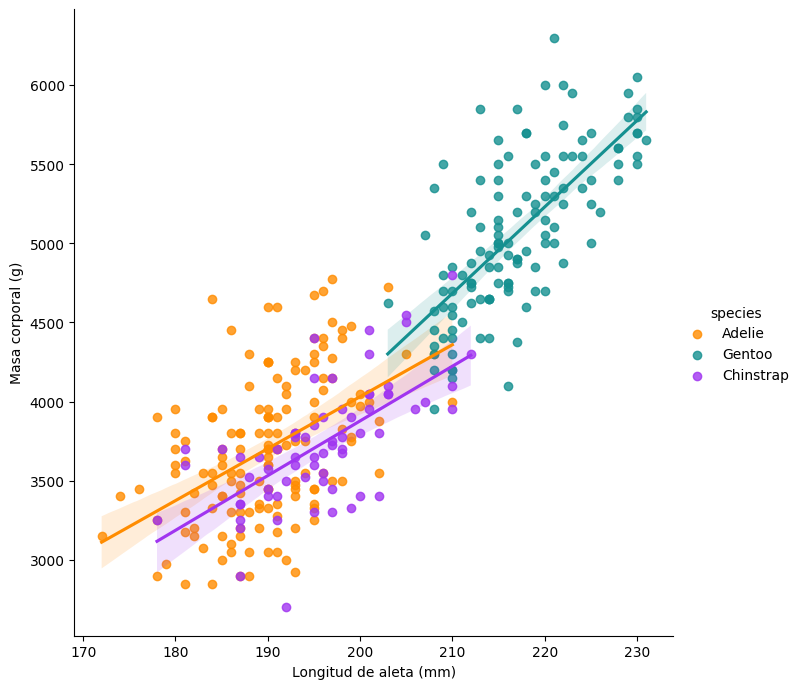

In [ ]:
g = sb.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=palmer_penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Longitud de aleta (mm)')
g.set_ylabels('Masa corporal (g)')

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>,
        <Axes: title={'center': 'flipper_length_mm'}>],
       [<Axes: title={'center': 'body_mass_g'}>,
        <Axes: title={'center': 'year'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

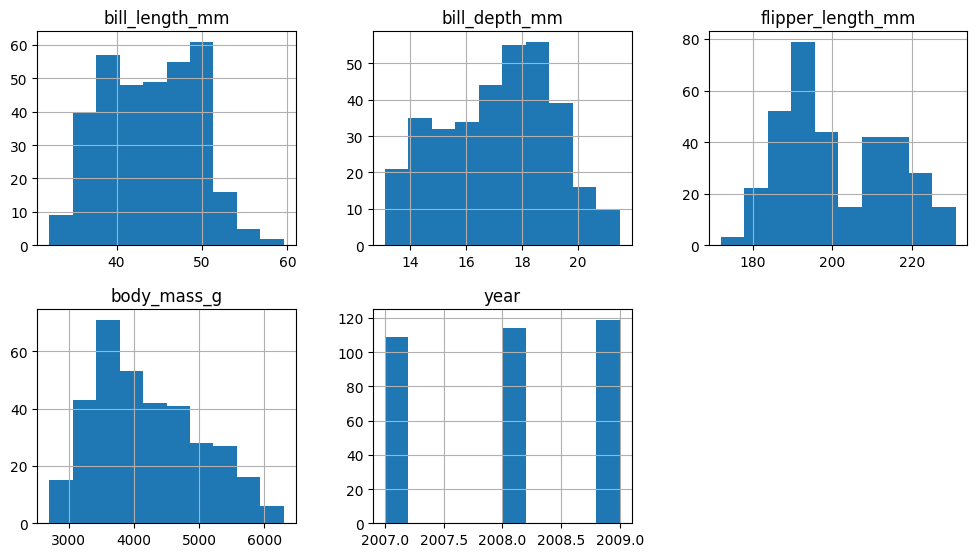

In [ ]:
palmer_penguins.hist(bins=10,figsize=(12, 10), layout=(3, 3))

In [ ]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = palmer_penguins.select_dtypes(include=['number']).corr(method='pearson')

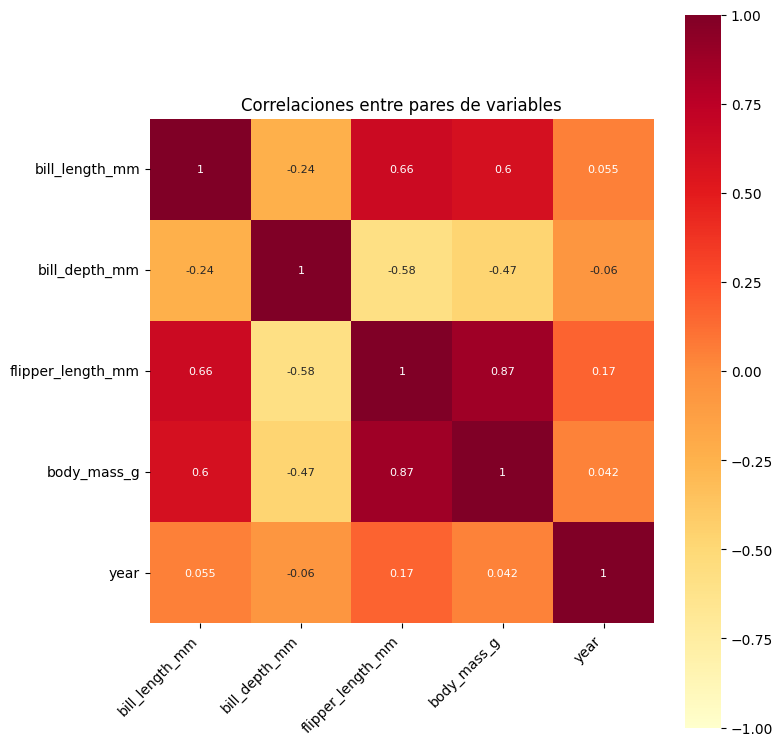

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap="YlOrRd",
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

**Usamos la distancia de Mahalanobis**   
Metrica cuya utilidad radica en que es una forma de determinar la similitud entre dos variables aleatorias multidimensionales. Se diferencia de la distancia euclídea en que tiene en cuenta la correlación entre las variables aleatorias.   
La definimos como, 
$$d(x,y) = \sqrt{(x-y)^TS^{-1}(x-y)}$$   
donde $S$ es la matriz de covarianza.

In [ ]:
df_penguins = palmer_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()
cov_matrix = np.cov(df_penguins.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
cov_matrix, inv_cov_matrix

(array([[    29.807,     -2.534,     50.376,   2605.592],
        [    -2.534,      3.9  ,    -16.213,   -747.37 ],
        [    50.376,    -16.213,    197.732,   9824.416],
        [  2605.592,   -747.37 ,   9824.416, 643131.077]]),
 array([[ 0.063, -0.038, -0.018, -0.   ],
        [-0.038,  0.416,  0.05 , -0.   ],
        [-0.018,  0.05 ,  0.03 , -0.   ],
        [-0.   , -0.   , -0.   ,  0.   ]]))

In [ ]:
mahal_matrix = distance.cdist(df_penguins, df_penguins, metric='mahalanobis', VI=inv_cov_matrix)
print(mahal_matrix)

[[0.    0.803 3.288 ... 2.54  4.036 3.066]
 [0.803 0.    2.863 ... 2.388 3.84  2.892]
 [3.288 2.863 0.    ... 2.869 2.198 2.373]
 ...
 [2.54  2.388 2.869 ... 0.    2.564 0.999]
 [4.036 3.84  2.198 ... 2.564 0.    1.603]
 [3.066 2.892 2.373 ... 0.999 1.603 0.   ]]


In [ ]:
M_reduced_penguin = classic_MDS(mahal_matrix, k=2)

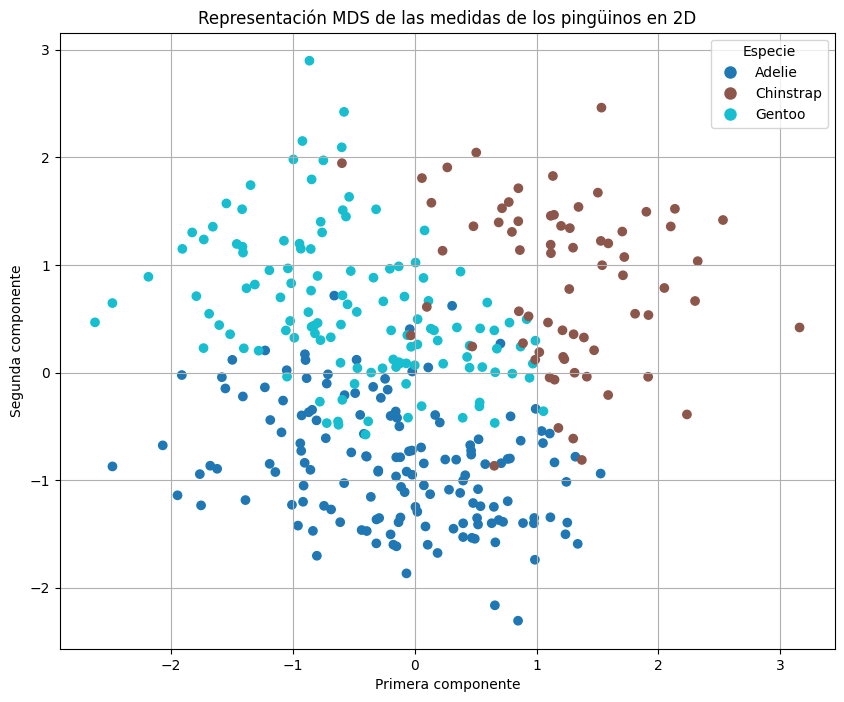

In [ ]:

species = palmer_penguins['species'].values

le = LabelEncoder()
species_encoded = le.fit_transform(species)  # Adelie -> 0, Chinstrap -> 1, Gentoo -> 2

colors = cm.tab10(species_encoded / species_encoded.max())

# Graficar en 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(M_reduced_penguin[:, 0], M_reduced_penguin[:, 1], c=colors, marker='o')

plt.title('Representación MDS de las medidas de los pingüinos en 2D')
plt.xlabel('Primera componente')
plt.ylabel('Segunda componente')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=cm.tab10(i / species_encoded.max()), markersize=10)
    for i, label in enumerate(le.classes_)
]
plt.legend(handles=legend_elements, title="Especie")

plt.grid(True)
plt.show()


Stress: 0.4005


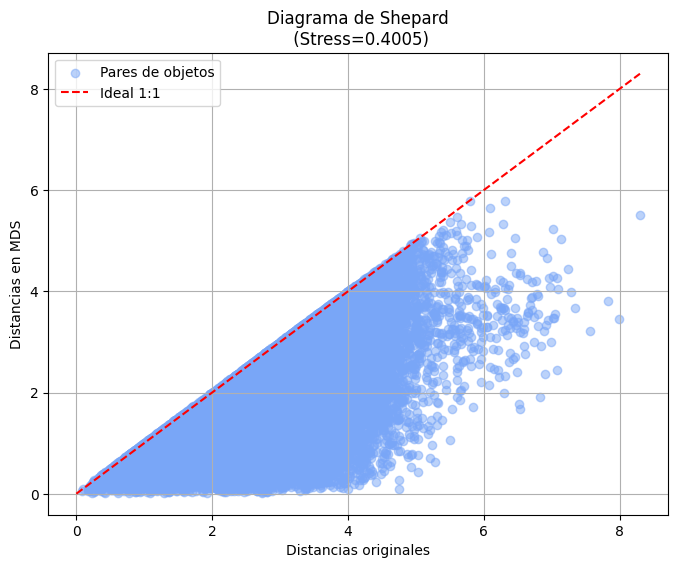

In [ ]:
distancias_originales = mahal_matrix  
distancias_reducidas = pairwise_distances(M_reduced_penguin)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

In [ ]:
M3_reduced_penguin = classic_MDS(mahal_matrix, k=3)

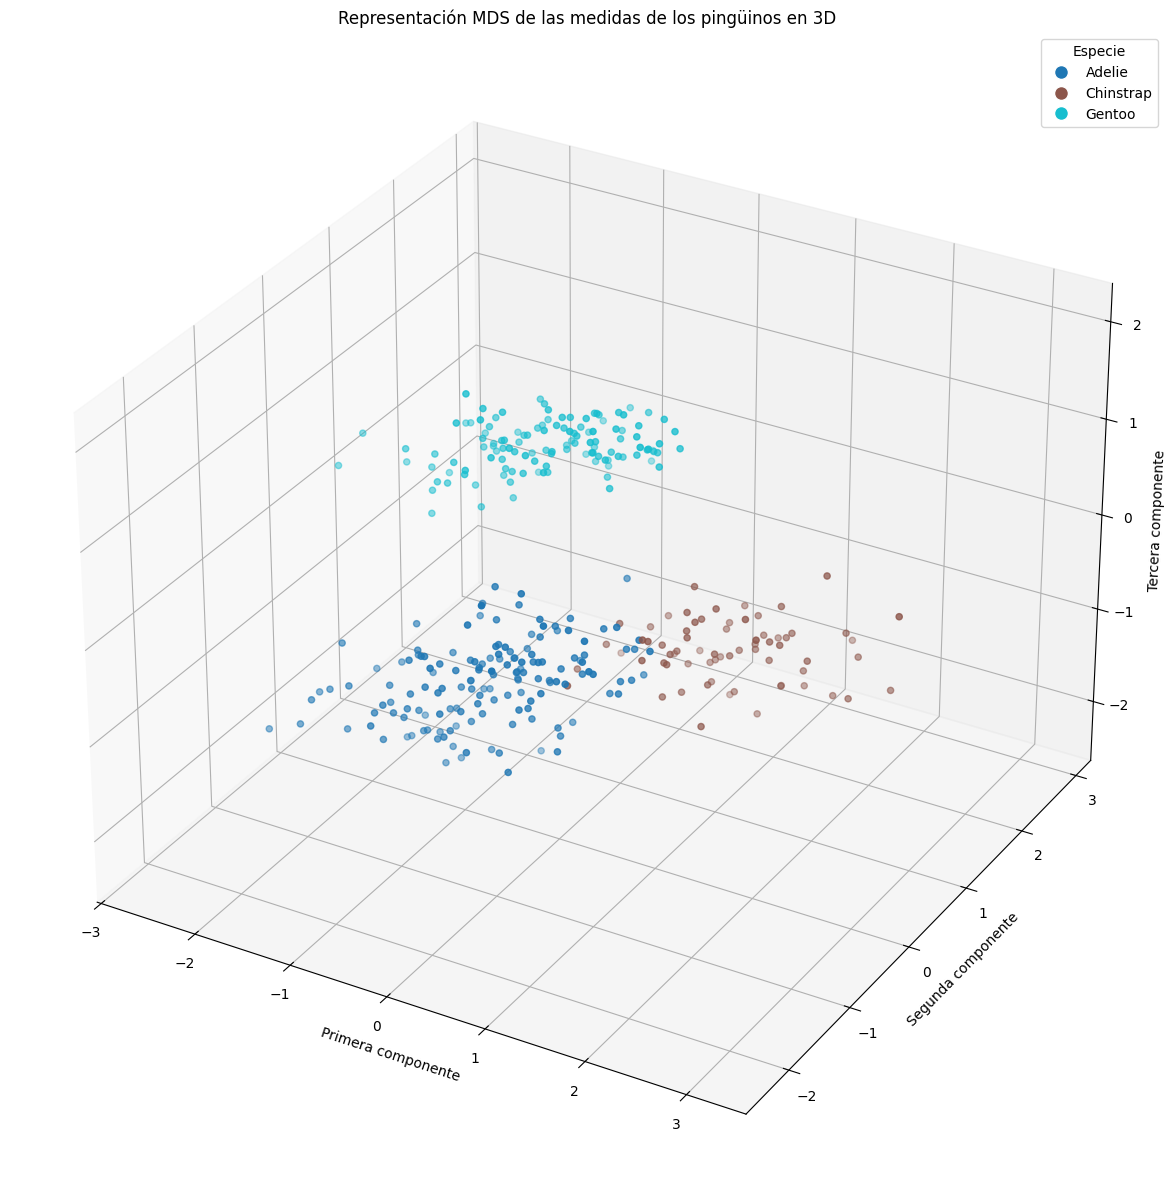

In [ ]:

# Graficar en 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(M3_reduced_penguin[:, 0], M3_reduced_penguin[:, 1], M3_reduced_penguin[:, 2], c=colors, marker='o')

ax.set_title('Representación MDS de las medidas de los pingüinos en 3D')
ax.set_xlabel('Primera componente')
ax.set_ylabel('Segunda componente')
ax.set_zlabel('Tercera componente')

# Agrega leyenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=cm.tab10(i / max(species_encoded)), markersize=10)
                   for i, label in enumerate(le.classes_)]
ax.legend(handles=legend_elements, title="Especie")

plt.show()


Stress: 0.2316


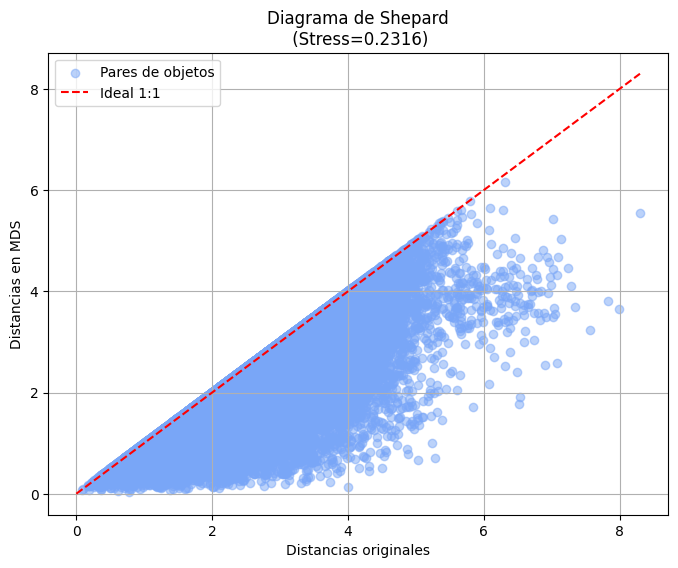

In [ ]:
distancias_originales = mahal_matrix  
distancias_reducidas = pairwise_distances(M3_reduced_penguin)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

Stress: 0.0


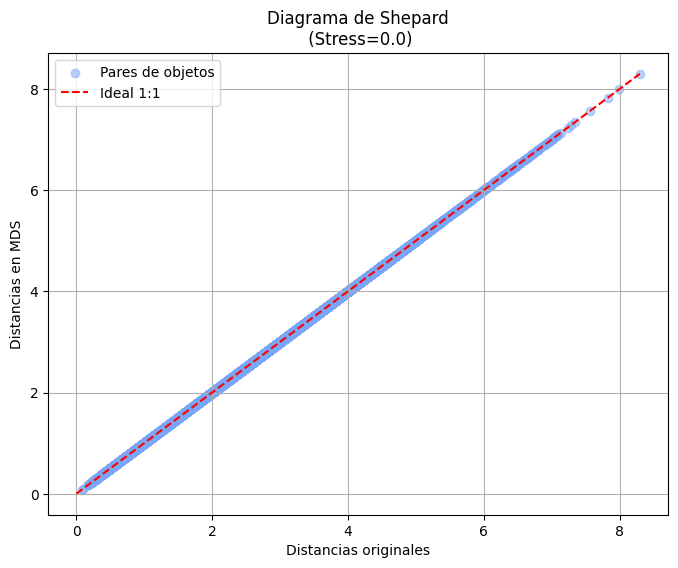

In [ ]:
M4_reduced_penguin = classic_MDS(mahal_matrix, k=4)

distancias_originales = mahal_matrix  
distancias_reducidas = pairwise_distances(M4_reduced_penguin)

stress = np.sqrt(np.sum((distancias_originales - distancias_reducidas)**2) / np.sum(distancias_originales**2))
print("Stress:", round(stress,4))

# Obtener pares de distancias (triángulo inferior sin diagonal)
idx = np.tril_indices_from(distancias_originales, k=-1)
d_orig = distancias_originales[idx]
d_mds = distancias_reducidas[idx]

# Gráfico de Shepard
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_mds, color='#79a6f7', alpha=0.5, label='Pares de objetos')
plt.plot([0, np.max(d_orig)], [0, np.max(d_orig)], 'r--', label='Ideal 1:1')


plt.title(f'Diagrama de Shepard\n (Stress={round(stress, 4)})')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias en MDS')
plt.legend()
plt.grid()
plt.show()

*Intento corrección*

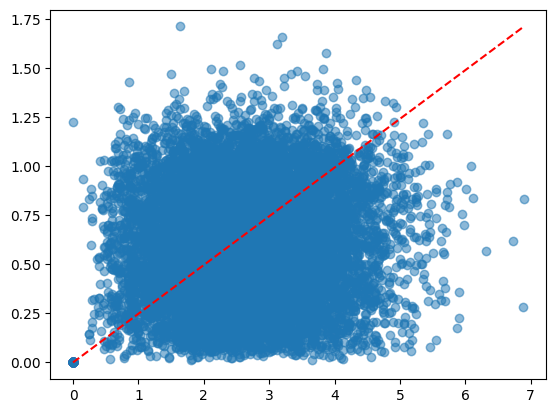

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.manifold import MDS

# Datos de ejemplo (iris)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Matriz de covarianza y su inversa
cov_matrix = np.cov(df.T)
inv_cov = np.linalg.pinv(cov_matrix)  # Pseudoinversa para estabilidad

# Distancias de Mahalanobis
mahal = cdist(df, df, metric='mahalanobis', VI=inv_cov)

# MDS no métrico
mds = MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(mahal)

# Shepard plot
d_rec = cdist(coords, coords, 'euclidean')
plt.scatter(mahal.flatten(), d_rec.flatten(), alpha=0.3)
plt.plot([0, mahal.max()], [0, d_rec.max()], 'r--')
plt.show()